# Personal Finance Insights Dashboard
---

## Objetivo general del EDA

El objetivo principal es comprender los patrones financieros personales, observando cómo influyen factores como la edad, la educación o el empleo en indicadores clave como la deuda, el ahorro y la puntuación crediticia. Se hará un análisis Demográfico y Geográfico exhaustivo.


1.	Analizar la relación entre variables financieras clave, como:

	* debt_to_income_ratio: proporción entre deuda e ingresos.
	* credit_score: puntuación crediticia (300–850).
	* savings_to_income_ratio: proporción entre ahorro e ingresos.
	* savings_usd: total ahorros acumulado por individuo.
	
2.	Comparar los indicadores financieros según variables demográficas y laborales:
	* Edad (age).
	* Género (gender).
	* region: zona geográfica de residencia.
	* Nivel educativo (education_level).
	* Situación laboral (employment_status).
	* Puesto de trabajo (job_title).

3.	Identificar posibles patrones o desigualdades financieras entre grupos de población, regiones o tipos de empleo.

4.	Detectar relaciones de interés entre el perfil personal y la estabilidad económica (por ejemplo, cómo varía el credit_score según la educación o la relación entre ingresos y ahorro por tipo de empleo).

---

## Visualizaciones Incluidas

* Distribuciones y boxplots de ratios financieros (DTI, Savings/Income, Credit Score).
* Comparativas por categoría (género, educación, empleo, región).
* Relaciones entre variables numéricas mediante scatter plots y correlaciones.
* Tablas y resúmenes estadísticos para observar diferencias entre grupos.
* Gráficos de barras para analizar medias y medianas de indicadores financieros por categoría.

---

## Valor del Análisis

* Permite entender el comportamiento financiero medio de diferentes perfiles de personas.
* Facilita detectar grupos con mayor riesgo o menor estabilidad económica (por ejemplo, alto DTI o bajo ahorro).
* Proporciona una base sólida para futuras fases de modelado o segmentación, en caso de ampliarse el proyecto.
* Ayuda a visualizar desigualdades financieras entre regiones, niveles educativos o tipos de empleo.

# 1.- Librerías

In [4]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd #manejo de estructura de datos tabulares
import numpy as np # manejo de arrays y operaciones matemáticas

# libreria para crear mapas interactivos
# -----------------------------------------------------------------------
import folium
from folium.plugins import HeatMap, MarkerCluster


# librerias para visualizar datos
# -----------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud


# Libreria para acceder a funciones del sistema 
# -----------------------------------------------------------------------
import sys 
sys.path.append("../")

# Warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

# Configuracion de pandas
# -----------------------------------------------------------------------
pd.options.display.max_columns = None

# 2.-Cargar datos

In [6]:
# cargamos los datos limpios
df = pd.read_pickle("../data/processed/Personal_Finance_ML_Dataset_limpio.pkl")
df.reset_index(inplace=True)
df.head()

,index,user_id,age,gender,education_level,employment_status,job_title,monthly_income_usd,monthly_expenses_usd,savings_usd,has_loan,loan_type,loan_amount_usd,loan_term_months,monthly_emi_usd,loan_interest_rate_pct,debt_to_income_ratio,credit_score,savings_to_income_ratio,region,record_date
0,0,U00001,56,Female,High School,Self-employed,Salesperson,3531.69,1182.59,367655.03,False,No_loan,0.00,0,0.00,0.00,0.00,430,8.68,Other,2024-01-09
1,1,U00002,19,Female,PhD,Employed,Salesperson,3531.73,2367.99,260869.10,True,Education,146323.34,36,4953.50,13.33,1.40,543,6.16,North America,2022-02-13
2,2,U00003,20,Female,Master,Employed,Teacher,2799.49,1003.91,230921.21,False,No_loan,0.00,0,0.00,0.00,0.00,754,6.87,Africa,2022-05-12
3,3,U00004,25,Male,PhD,Employed,Manager,5894.88,4440.12,304815.51,True,Business,93242.37,24,4926.57,23.93,0.84,461,4.31,Europe,2023-10-02
4,4,U00005,53,Female,PhD,Employed,Student,5128.93,4137.61,461509.48,False,No_loan,0.00,0,0.00,0.00,0.00,516,7.50,Africa,2021-08-07


# 3.- Análisis General

## 3.1.- Tablas de resumen (visión rápida)

Definimos paleta de colores

In [47]:
# Paleta y estilos
color_activos  = '#2ecc71'
color_churned  = '#e74c3c'
color_total    = '#3498db'
colors_donut   = ['#e74c3c', '#f39c12', '#2ecc71']

color_extra1   = '#f39c12'   # naranja
color_extra2   = '#f1c40f'   # amarillo

explode        = (0.05, 0.05, 0.05)

#### 1.- Enmarcar el dataset

In [11]:
kpis = {
    "n_personas": len(df),
    "n_columnas": df.shape[1],
    "min_fecha": df.record_date.min(),
    "max_fecha": df.record_date.max()
}
pd.Series(kpis)

n_personas                  32424
n_columnas                     21
min_fecha     2021-07-23 00:00:00
max_fecha     2025-07-22 00:00:00
dtype: object

El dataset contiene 32.424 registros y 21 columnas (está contando el index), con fechas que abarcan desde julio de 2021 hasta julio de 2025.

#### 2.- Tabla de descriptivos clave (media y mediana) de:
debt_to_income_ratio, credit_score, savings_to_income_ratio, savings_usd.Esto establece rangos y posibles outliers.

In [12]:
num_cols = ["debt_to_income_ratio","credit_score","savings_to_income_ratio","savings_usd"]
resumen = df[num_cols].describe(percentiles=[.25,.5,.75]).T
resumen[["mean","50%","min","25%","75%","max"]].round(2)

,mean,50%,min,25%,75%,max
debt_to_income_ratio,1.19,0.00,0.00,0.00,0.92,90.67
credit_score,575.26,575.00,300.00,437.00,714.00,850.00
savings_to_income_ratio,5.05,5.04,0.10,2.58,7.51,10.00
savings_usd,243752.04,201700.33,635.96,86291.55,358966.22,1237774.39


* La media del **Debt-to-Income Ratio (DTI)** es 1.19, pero la mediana es 0, lo que significa que la mayoría de personas no tienen deuda activa.
* El **Credit Score** promedio es 575, está dentro de una zona media-baja de solvencia.
* El **Savings-to-Income Ratio** tiene una media cercana a 5, lo que sugiere un nivel de ahorro moderado en relación con los ingresos.
* El valor medio de **savings_usd** (243.752 USD) muestra la presencia de algunos ahorros muy altos que elevan la media, mientras que la mediana (201.700 USD) refleja una distribución más realista para la mayoría.

In [ ]:
# Esto muestra una línea con el % de ceros (estructural, sin préstamo).
(df["debt_to_income_ratio"].eq(0).mean()*100).round(2)

np.float64(59.95)

## 3.2 Distribuciones univariantes (forma y outliers)

#### 1.- Histogramas + KDE de debt_to_income_ratio, savings_to_income_ratio, savings_usd, credit_score.
Se pretende ver sesgo y colas largas.

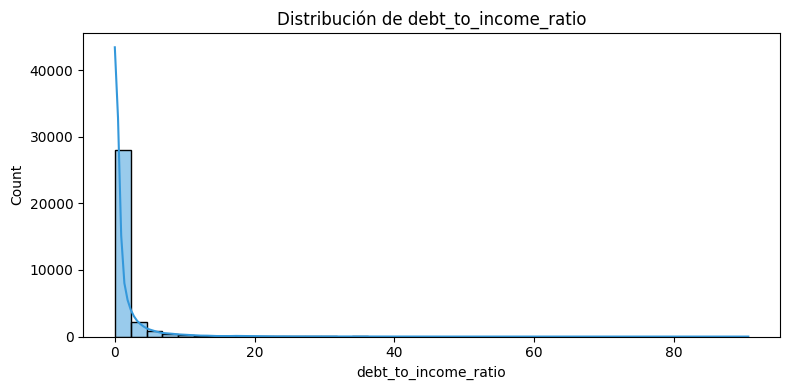

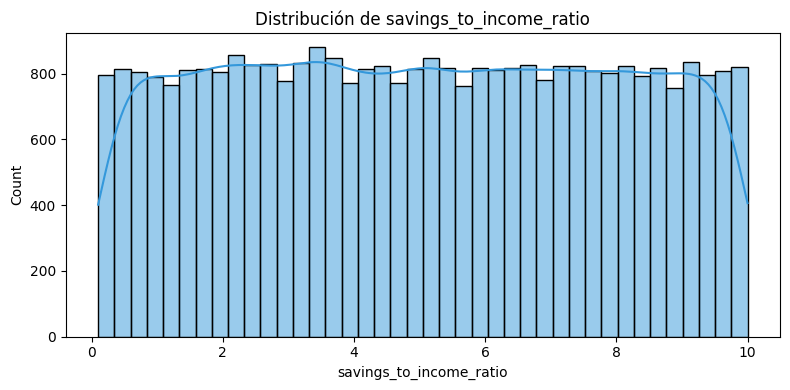

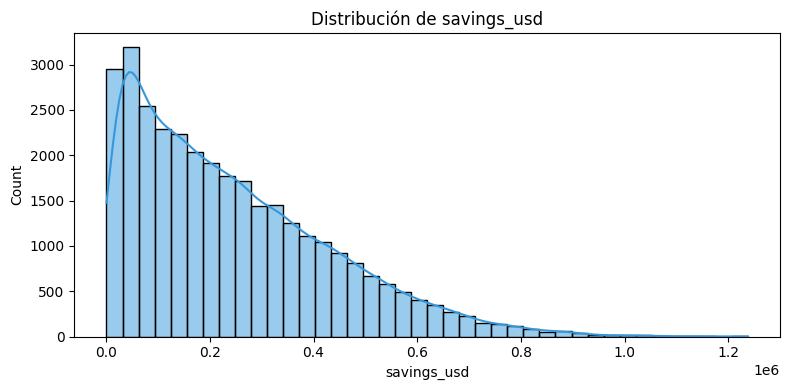

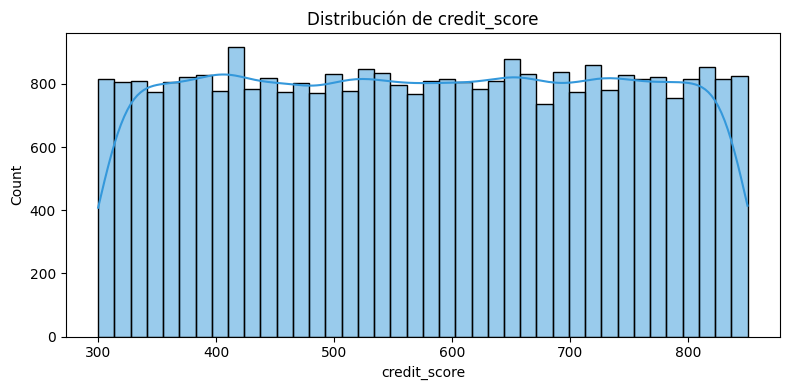

In [14]:
color_total = '#3498db'
for c in ["debt_to_income_ratio","savings_to_income_ratio","savings_usd","credit_score"]:
    plt.figure(figsize=(8,4))
    sns.histplot(df[c], bins=40, kde=True, color=color_total)
    plt.title(f"Distribución de {c}")
    plt.tight_layout(); plt.show()

* **DTI**: distribución muy sesgada a 0 con cola larga; confirma mucha gente sin deuda y algunos valores extremos.
* **Savings/Income**: distribución casi uniforme entre 0 y 10; parece un ratio sintético capado en 10.
* **Savings USD**: sesgo positivo fuerte; la mayoría tiene ahorros bajos/medios y pocos casos muy altos.
* **Credit score**: cobertura amplia 300–850 con reparto bastante plano; sin picos claros en la distribución bruta.

#### 2.- Boxplots de las mismas variables.
Con esto se pretende hacerlo mismo que antes pero para detectar outliers de un vistazo.

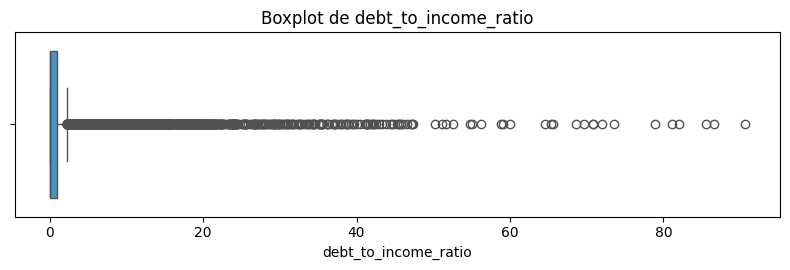

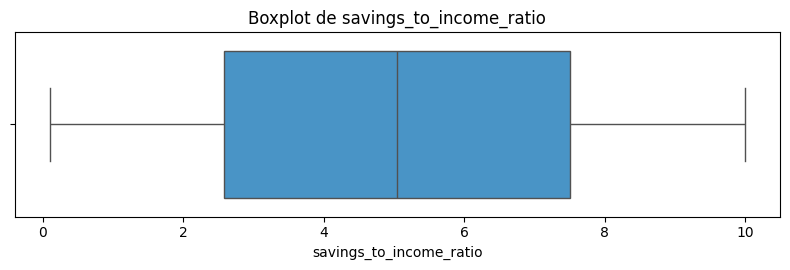

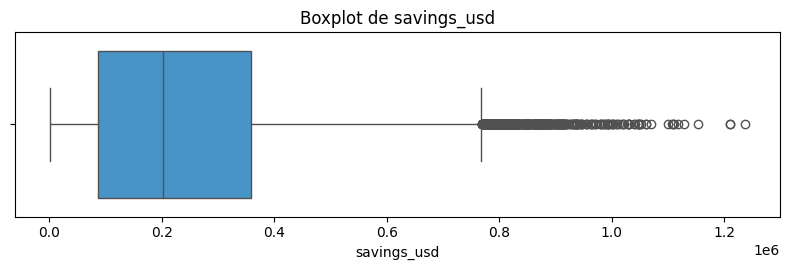

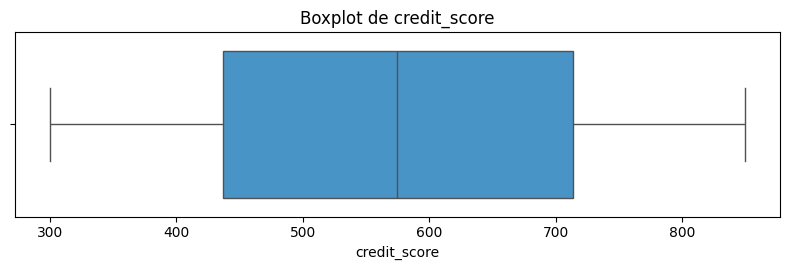

In [15]:
for c in ["debt_to_income_ratio","savings_to_income_ratio","savings_usd","credit_score"]:
    plt.figure(figsize=(8,2.8))
    sns.boxplot(x=df[c], color=color_total)
    plt.title(f"Boxplot de {c}")
    plt.tight_layout(); plt.show()

* **DTI**: mediana en 0 y muchísimos outliers altos; conviene tratar escala/extremos en comparativas.
* **Savings/Income**: IQR aprox. 3–7 con pocos outliers; ratio estable para la mayoría.
* **Savings USD**: mediana 0.2–0.3M y cola de outliers hacia >0.8M; fuerte asimetría.
* **Credit score**: mediana 575 y rango intercuartílico aprox. 450–700; variabilidad moderada.

#### 3.- Crédit Score por bandas (Poor/Fair/Good/Very Good/Excellent).
Esto clasifica la población por calidad crediticia.

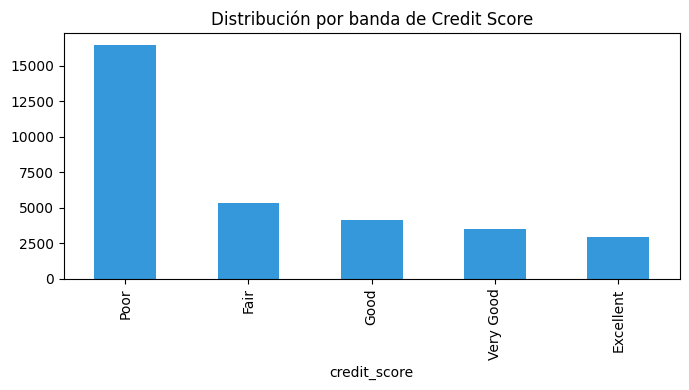

In [16]:
bins  = [300,580,670,740,800,850]
labels= ["Poor","Fair","Good","Very Good","Excellent"]
score_band = pd.cut(df["credit_score"], bins=bins, labels=labels, include_lowest=True)
score_band.value_counts().reindex(labels).plot(kind="bar", color=color_total, figsize=(7,4))
plt.title("Distribución por banda de Credit Score"); plt.tight_layout(); plt.show()

* Predomina la banda Poor, seguida de Fair, y luego Good/Very Good/Excellent decrecientes.
* En general, el perfil crediticio está sesgado hacia calidades bajas/medias, no hacia “excellent”.

## 3.3.- Relaciones bivariantes numéricas (panorama)

#### 1.- **Ingreso vs Gastos** (contexto financiero).
Sirve para ver la población “ahorradora” (por debajo de la línea 45°) vs “deficitaria” (los que gastan).

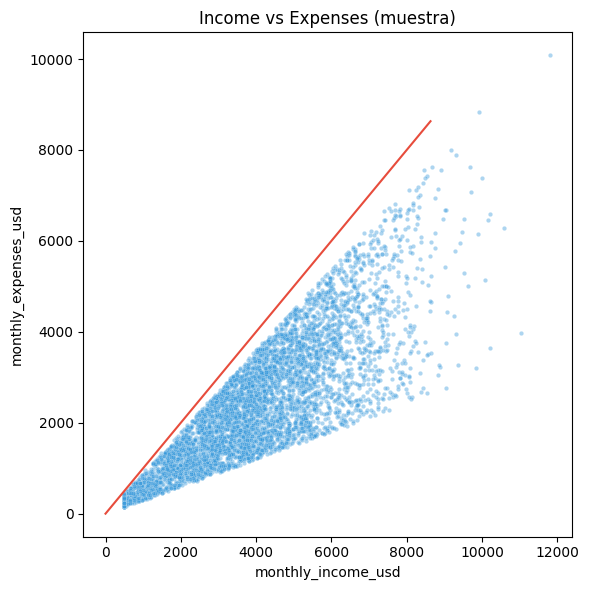

In [24]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=df.sample(min(len(df), 5000), random_state=42),
                x="monthly_income_usd", y="monthly_expenses_usd", s=10, alpha=.4, color=color_total)
lim = max(df["monthly_income_usd"].quantile(.99), df["monthly_expenses_usd"].quantile(.99))
plt.plot([0,lim],[0,lim], color=color_churned, lw=1.5)  # línea y=x
plt.title("Income vs Expenses (muestra)"); plt.tight_layout(); plt.show()

La mayoría de los puntos se sitúan por debajo de la línea 45°, lo que indica que la mayoría de las personas gastan menos de lo que ingresan. Solo unos pocos casos se acercan o superan la línea, mostrando posibles situaciones de gasto elevado.

#### 2.- **Scatter DTI vs Credit Score** con línea de tendencia.

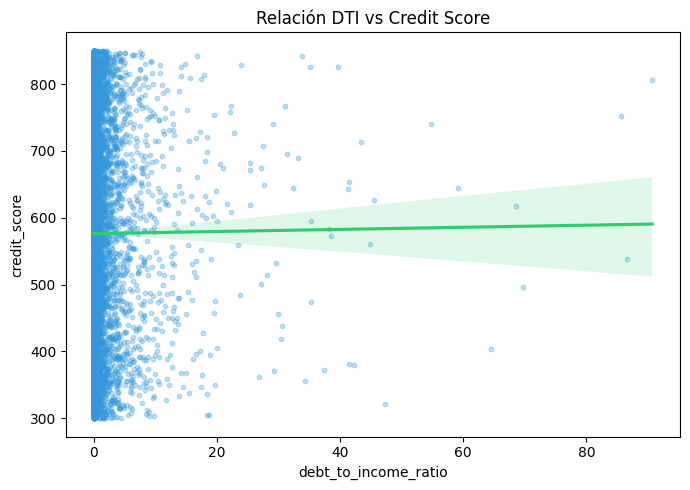

In [25]:
plt.figure(figsize=(7,5))
sns.regplot(data=df.sample(min(len(df), 8000), random_state=42),
            x="debt_to_income_ratio", y="credit_score",
            scatter_kws=dict(s=10, alpha=.3, color=color_total),
            line_kws=dict(color=color_activos))
plt.title("Relación DTI vs Credit Score"); plt.tight_layout(); plt.show()

No se observa una relación clara entre DTI y el puntaje crediticio; los valores están muy concentrados cerca de DTI = 0, lo que confirma que la mayoría no tiene deudas activas. El score se mantiene estable independientemente del nivel de deuda.

#### 3.- **Scatter Savings/Income vs Credit Score.**

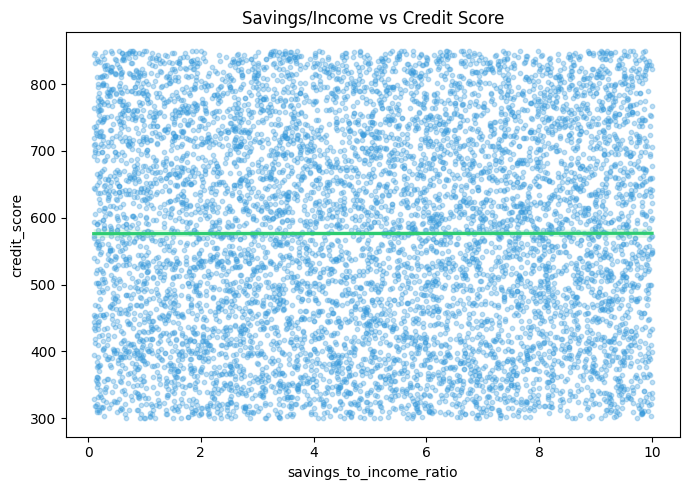

In [26]:
plt.figure(figsize=(7,5))
sns.regplot(data=df.sample(min(len(df), 8000), random_state=42),
            x="savings_to_income_ratio", y="credit_score",
            scatter_kws=dict(s=10, alpha=.3, color=color_total),
            line_kws=dict(color=color_activos))
plt.title("Savings/Income vs Credit Score"); plt.tight_layout(); plt.show()

La relación entre ahorro e ingresos y el puntaje crediticio es prácticamente nula; las puntuaciones se distribuyen de forma uniforme a lo largo de todo el rango de ahorro. No se aprecia una tendencia directa entre mayor ahorro y mejor score.

## 3.4.- Correlaciones rápidas

#### 1.- Matriz de correlación de variables numéricas clave.
El objetivo es saber qué pares explorar después en el apartado 4 del EDA

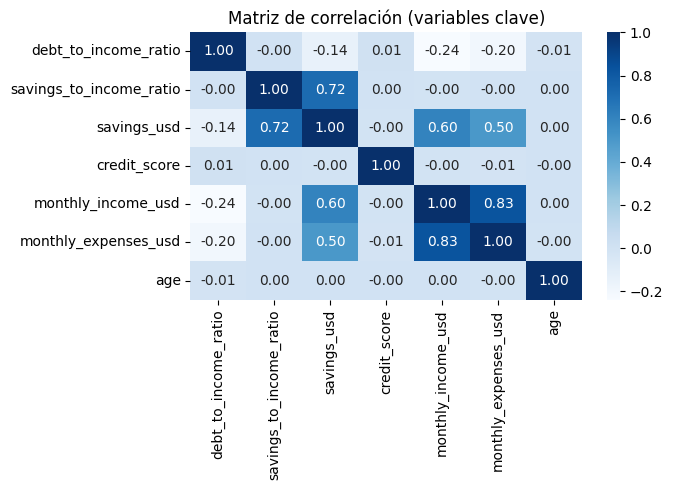

In [20]:
num_cols = ["debt_to_income_ratio","savings_to_income_ratio","savings_usd","credit_score",
            "monthly_income_usd","monthly_expenses_usd","age"]
corr = df[num_cols].corr(numeric_only=True)
plt.figure(figsize=(7,5))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="Blues")
plt.title("Matriz de correlación (variables clave)"); plt.tight_layout(); plt.show()

Se observa una fuerte correlación positiva entre savings_to_income_ratio y savings_usd (0.72), lo que confirma que ambas miden el nivel de ahorro.

Los ingresos (monthly_income_usd) se relacionan de forma moderada con los ahorros (0.60) y los gastos (0.83), mostrando coherencia entre las variables financieras.

En cambio, el credit_score y el debt_to_income_ratio no presentan correlaciones significativas con el resto de variables, lo que sugiere que podrían depender de otros factores no reflejados directamente en el dataset.

## 3.5.- Panorama categórico (frecuencias principales)

#### 1.- Top categorías: region, education_level, employment_status, job_title (Top-10).
El objetivo es entender el “peso” de cada grupo antes de pasar al apartado 4 del EDA.

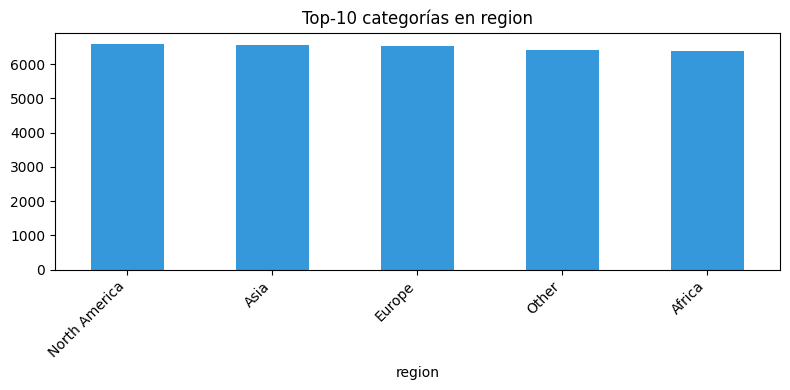

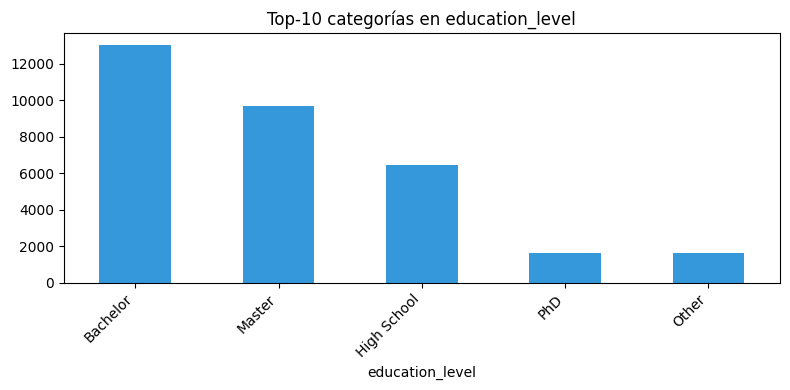

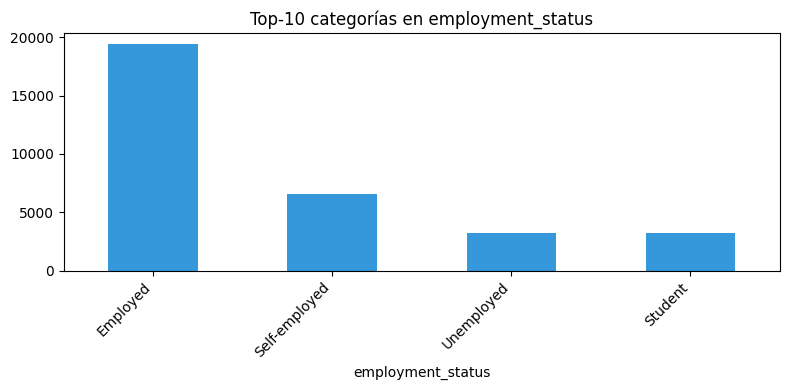

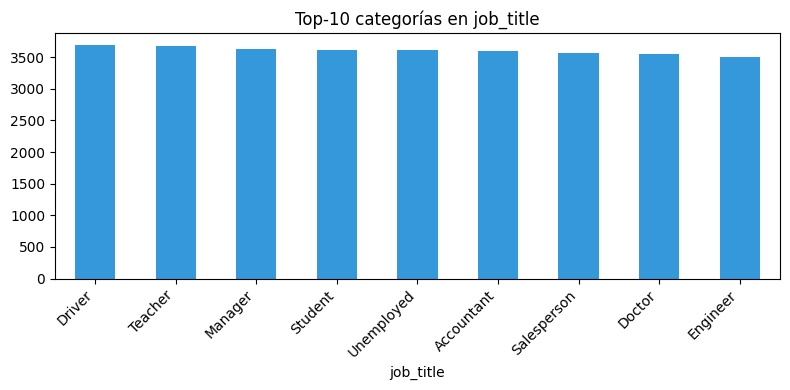

In [21]:
cats = ["region","education_level","employment_status","job_title"]
for c in cats:
    plt.figure(figsize=(8,4))
    df[c].value_counts().head(10).plot(kind="bar", color=color_total)
    plt.title(f"Top-10 categorías en {c}"); plt.xticks(rotation=45, ha="right")
    plt.tight_layout(); plt.show()

* La columna region está muy equilibrada entre continentes.
* En education_level, el nivel Bachelor es el más común, seguido de Master y High School.
* En employment_status, la mayoría está empleada, con menor presencia de autónomos, desempleados y estudiantes.
* En job_title, las profesiones más frecuentes son Driver, Teacher y Manager, aunque la distribución entre los 10 primeros puestos es bastante homogénea.

#### 2.- Tarta de region.

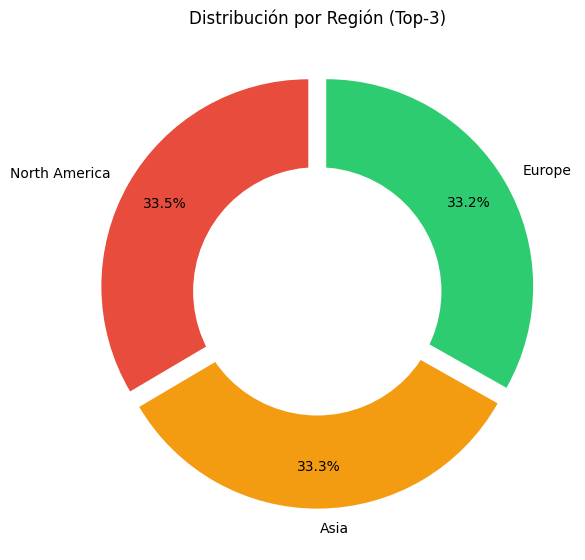

In [22]:
values = df["region"].value_counts().head(3)
colors_donut = ['#e74c3c', '#f39c12', '#2ecc71']; explode = (0.05,0.05,0.05)
fig, ax = plt.subplots(figsize=(6,6))
ax.pie(values, labels=values.index, colors=colors_donut, explode=explode,
       autopct='%1.1f%%', startangle=90, pctdistance=.8)
centre = plt.Circle((0,0),0.60,fc='white'); fig.gca().add_artist(centre)
ax.set_title("Distribución por Región (Top-3)"); plt.tight_layout(); plt.show()

El reparto regional está muy equilibrado entre North America, Asia y Europe, cada una con alrededor del 33% del total.

#### El mapa colorea cada país con el DTI medio de su región.

In [ ]:
import plotly.express as px

# ---------- 1) Métrica por región a pintar en el mapa ----------
# Puedes usar 'DTI_mean' (=media) o 'pct_deuda' (=% con DTI>0)
df_r = (df[["region", "debt_to_income_ratio"]]
        .rename(columns={"debt_to_income_ratio":"DTI"})
        .replace([np.inf, -np.inf], np.nan)
        .dropna())

stats_reg = (df_r.groupby("region")
             .agg(DTI_mean=("DTI","mean"),
                  pct_deuda=("DTI", lambda s: (s>0).mean()*100),
                  n=("DTI","count"))
             .reset_index())

# ---------- 2) Construimos el mapping país -> region ----------
gap = px.data.gapminder()
all_countries = set(gap["country"].unique())

# Europe / Asia / Africa desde gapminder
EUROPE = set(gap.loc[gap["continent"]=="Europe", "country"])
ASIA   = set(gap.loc[gap["continent"]=="Asia", "country"])
AFRICA = set(gap.loc[gap["continent"]=="Africa", "country"])

# North America (lista manual — Caribe + Centroamérica incluidos)
NORTH_AMERICA = {
    'United States', 'Canada', 'Mexico',
    'Guatemala','Honduras','Nicaragua','El Salvador','Costa Rica','Panama',
    'Cuba','Dominican Republic','Haiti','Jamaica','Trinidad and Tobago',
    'Bahamas','Barbados','Belize','Dominica','Grenada','Saint Lucia',
    'Antigua and Barbuda','Saint Vincent and the Grenadines'
}

# Other = resto (Oceania + Sudamérica, etc.)
OTHER = all_countries - (EUROPE | ASIA | AFRICA | NORTH_AMERICA)

def to_region(country):
    if country in NORTH_AMERICA: return "North America"
    if country in EUROPE:        return "Europe"
    if country in ASIA:          return "Asia"
    if country in AFRICA:        return "Africa"
    return "Other"

countries_region = pd.DataFrame({
    "country": list(all_countries),
})
countries_region["region"] = countries_region["country"].map(to_region)

# ---------- 3) Asignamos a cada país la métrica de su región ----------
# Elige qué columna quieres pintar en 'metric_col'
metric_col = "DTI_mean"    # <- cámbialo a "pct_deuda" si prefieres %
paint_df = countries_region.merge(stats_reg[["region", metric_col]], on="region", how="left")

# ---------- 4) Choropleth ----------
title_txt = "DTI medio por región (pintado por país)" if metric_col=="DTI_mean" \
            else "% de personas con deuda (DTI>0) por región (pintado por país)"

fig = px.choropleth(
    paint_df,
    locations="country",
    locationmode="country names",
    color=metric_col,
    scope="world",
    color_continuous_scale="Viridis",
    title=title_txt
)
fig.update_layout(margin=dict(l=0,r=0,t=60,b=0))
fig.show()

# 4.- Análisis Demográfico y Geográfico

## 4.1.- Edad

### 1.- age vs debt_to_income_ratio

#### A) Preparación y scatter con tendencia (capado en p99 para outliers)

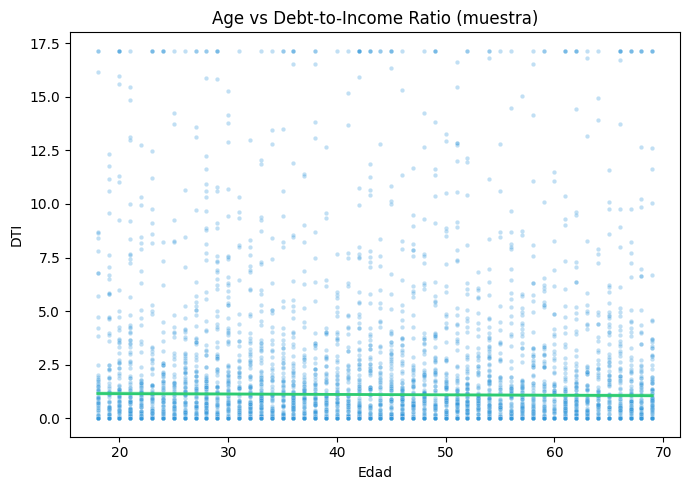

In [ ]:
# gráfico
# Subconjunto limpio
cols = ["age", "debt_to_income_ratio"]
df_age = (df[cols]
          .apply(pd.to_numeric, errors="coerce")
          .replace([np.inf, -np.inf], np.nan)
          .dropna())

# Limita cola extrema para visualizar mejor
p99 = df_age["debt_to_income_ratio"].quantile(0.99)
df_scatter = df_age.copy()
df_scatter["debt_to_income_ratio"] = df_scatter["debt_to_income_ratio"].clip(upper=p99)

sample_scatter = df_scatter.sample(min(len(df_scatter), 8000), random_state=42)

plt.figure(figsize=(7,5))
sns.scatterplot(data=sample_scatter, x="age", y="debt_to_income_ratio",
                s=10, alpha=.3, color=color_total)
sns.regplot(data=sample_scatter, x="age", y="debt_to_income_ratio",
            scatter=False, line_kws=dict(color=color_activos, linewidth=2))
plt.title("Age vs Debt-to-Income Ratio (muestra)")
plt.xlabel("Edad"); plt.ylabel("DTI")
plt.tight_layout(); plt.show()

# Esto nos muestra la relación global edad–DTI minimizando el efecto de outliers (capado p99).

No se aprecia una relación clara entre edad y nivel de deuda; el DTI se mantiene bajo y bastante homogéneo en todas las edades.

#### B) Boxplot por tramos de edad (medianas sobrepuestas)

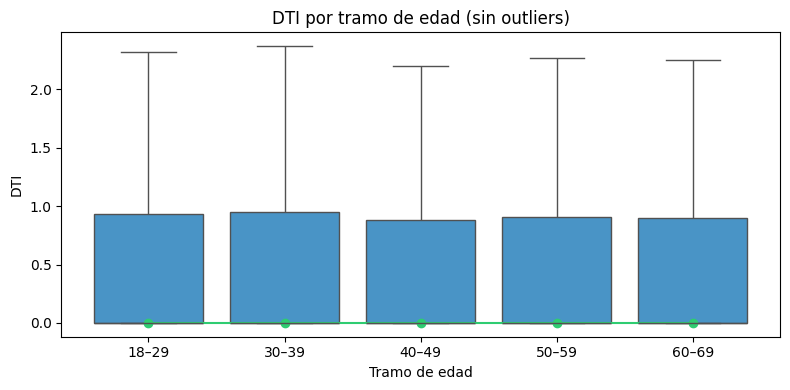

In [28]:
# Tramos de edad (puedes ajustarlos)
bins   = [18, 30, 40, 50, 60, 70]
labels = ["18–29", "30–39", "40–49", "50–59", "60–69"]
df_age["age_bin"] = pd.cut(df_age["age"], bins=bins, right=False, labels=labels)

plt.figure(figsize=(8,4))
sns.boxplot(data=df_age, x="age_bin", y="debt_to_income_ratio",
            color=color_total, showfliers=False)
# Medianas sobrepuestas
medianas = df_age.groupby("age_bin")["debt_to_income_ratio"].median()
plt.plot(range(len(medianas)), medianas.values, marker='o', color=color_activos)
plt.title("DTI por tramo de edad (sin outliers)")
plt.xlabel("Tramo de edad"); plt.ylabel("DTI")
plt.tight_layout(); plt.show()

# Esto compara niveles típicos de DTI (medianas/IQR) entre cohortes de edad.

Los tramos de edad presentan distribuciones muy similares, con medianas cercanas a cero, lo que indica que la mayoría mantiene niveles bajos de endeudamiento.

#### C) % de personas con deuda (>0) por tramo de edad

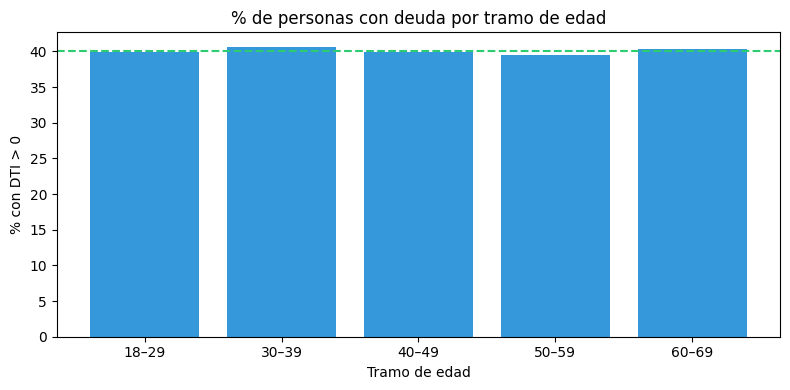

In [29]:
pct_con_deuda = (df_age.assign(has_debt = df_age["debt_to_income_ratio"] > 0)
                 .groupby("age_bin")["has_debt"].mean()*100)

plt.figure(figsize=(8,4))
plt.bar(pct_con_deuda.index.astype(str), pct_con_deuda.values, color=color_total)
plt.axhline(pct_con_deuda.mean(), color=color_activos, linestyle="--", linewidth=1.5)
plt.title("% de personas con deuda por tramo de edad")
plt.xlabel("Tramo de edad"); plt.ylabel("% con DTI > 0")
plt.tight_layout(); plt.show()

# Como hay muchos ceros estructurales, este gráfico contextualiza cuánta gente tiene deuda en cada tramo.

Aproximadamente un 40 % de las personas tiene algún tipo de deuda, y este porcentaje se mantiene estable en todos los grupos de edad.

### 2.- age vs credit_score

#### A) Scatter con línea de tendencia (capado en p99)

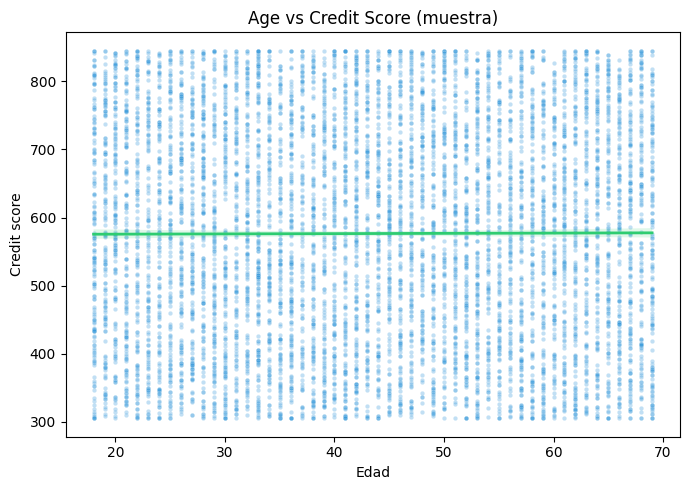

In [31]:
# Subconjunto limpio
cols = ["age", "credit_score"]
df_ac = (df[cols]
         .apply(pd.to_numeric, errors="coerce")
         .replace([np.inf, -np.inf], np.nan)
         .dropna())

# Capar extremos solo por seguridad visual (suele no ser necesario en score)
p01, p99 = df_ac["credit_score"].quantile([.01, .99])
df_scatter = df_ac.copy()
df_scatter["credit_score"] = df_scatter["credit_score"].clip(lower=p01, upper=p99)

sample_n = min(len(df_scatter), 8000)
sample_ac = df_scatter.sample(sample_n, random_state=42)

plt.figure(figsize=(7,5))
sns.scatterplot(data=sample_ac, x="age", y="credit_score",
                s=10, alpha=.3, color=color_total)
sns.regplot(data=sample_ac, x="age", y="credit_score",
            scatter=False, line_kws=dict(color=color_activos, linewidth=2))
plt.title("Age vs Credit Score (muestra)")
plt.xlabel("Edad"); plt.ylabel("Credit score")
plt.tight_layout(); plt.show()

No se aprecia una relación clara entre la edad y el puntaje crediticio; el credit score se mantiene estable en todas las edades.

#### B) Boxplot por tramos de edad (medianas sobrepuestas)

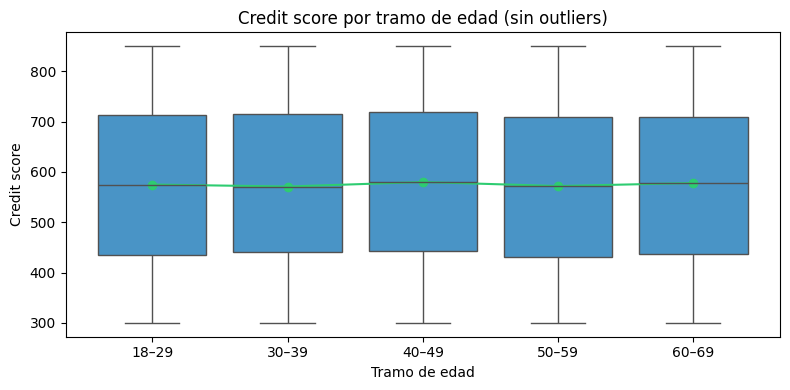

In [32]:
bins   = [18, 30, 40, 50, 60, 70]
labels = ["18–29", "30–39", "40–49", "50–59", "60–69"]
df_ac["age_bin"] = pd.cut(df_ac["age"], bins=bins, right=False, labels=labels)

plt.figure(figsize=(8,4))
sns.boxplot(data=df_ac, x="age_bin", y="credit_score",
            color=color_total, showfliers=False)
med = df_ac.groupby("age_bin")["credit_score"].median()
plt.plot(range(len(med)), med.values, marker='o', color=color_activos)
plt.title("Credit score por tramo de edad (sin outliers)")
plt.xlabel("Tramo de edad"); plt.ylabel("Credit score")
plt.tight_layout(); plt.show()

Los diferentes grupos de edad presentan niveles de crédito muy similares, con medianas alrededor de 575 y una dispersión homogénea.

#### C) Curva suavizada por edad (rolling/LOWESS simple por año)

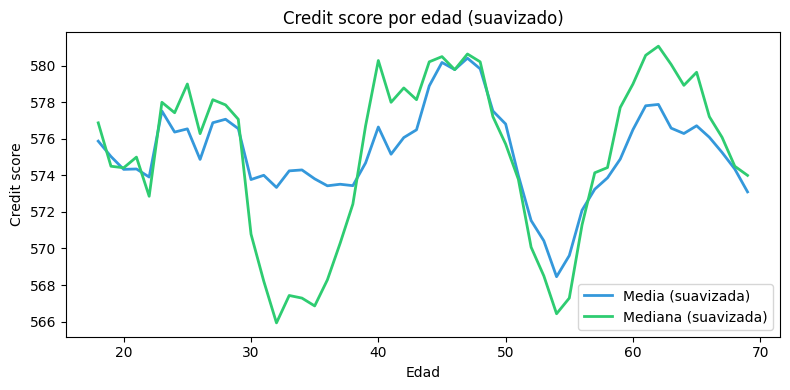

In [33]:
# Promedios por edad exacta (año) y suavizado con ventana
age_year = (df_ac.groupby("age")["credit_score"]
            .agg(["mean","median"]).reset_index())

# Suavizado por ventana móvil (puedes ajustar win=5,7,9)
win = 7
age_year["mean_smooth"]   = age_year["mean"].rolling(win, center=True, min_periods=1).mean()
age_year["median_smooth"] = age_year["median"].rolling(win, center=True, min_periods=1).mean()

plt.figure(figsize=(8,4))
plt.plot(age_year["age"], age_year["mean_smooth"],  label="Media (suavizada)",  linewidth=2, color=color_total)
plt.plot(age_year["age"], age_year["median_smooth"], label="Mediana (suavizada)", linewidth=2, color=color_activos)
plt.title("Credit score por edad (suavizado)")
plt.xlabel("Edad"); plt.ylabel("Credit score")
plt.legend(); plt.tight_layout(); plt.show()

La media y la mediana del credit score fluctúan ligeramente, pero en general se mantienen constantes entre 565 y 580, sin tendencia marcada por edad.

### 3.- age vs savings_to_income_ratio

#### A) Scatter con línea de tendencia (capado en p99)

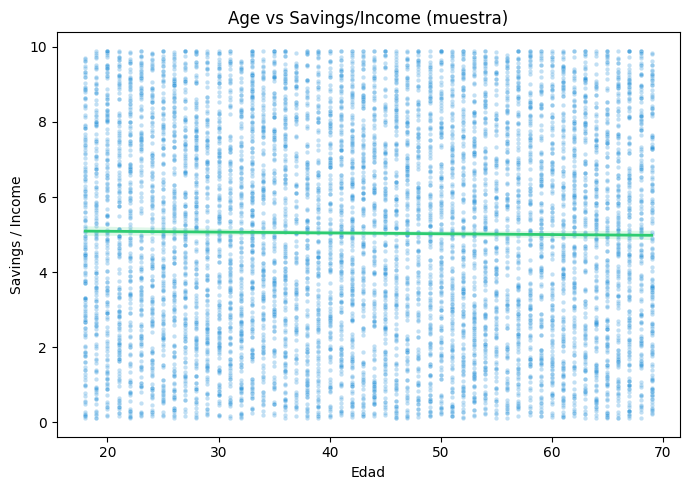

In [ ]:
# Subconjunto limpio
cols = ["age", "savings_to_income_ratio"]
df_as = (df[cols]
         .apply(pd.to_numeric, errors="coerce")
         .replace([np.inf, -np.inf], np.nan)
         .dropna())

# Capar extremos para visual (p99)
p99 = df_as["savings_to_income_ratio"].quantile(.99)
df_scatter = df_as.copy()
df_scatter["savings_to_income_ratio"] = df_scatter["savings_to_income_ratio"].clip(upper=p99)

sample_n = min(len(df_scatter), 8000)
sample_as = df_scatter.sample(sample_n, random_state=42)

plt.figure(figsize=(7,5))
sns.scatterplot(data=sample_as, x="age", y="savings_to_income_ratio",
                s=10, alpha=.3, color=color_total)
sns.regplot(data=sample_as, x="age", y="savings_to_income_ratio",
            scatter=False, line_kws=dict(color=color_activos, linewidth=2))
plt.title("Age vs Savings/Income (muestra)")
plt.xlabel("Edad"); plt.ylabel("Savings / Income")
plt.tight_layout(); plt.show()

# scatter muestra la nube real; la línea de tendencia ayuda a ver si el ahorro relativo mejora o no con la edad, sin que los topes distorsionen.

No se aprecia una relación entre la edad y el nivel de ahorro relativo; el ratio savings/income se mantiene estable en todas las edades.

#### B) Boxplot por tramos de edad (medianas sobrepuestas)

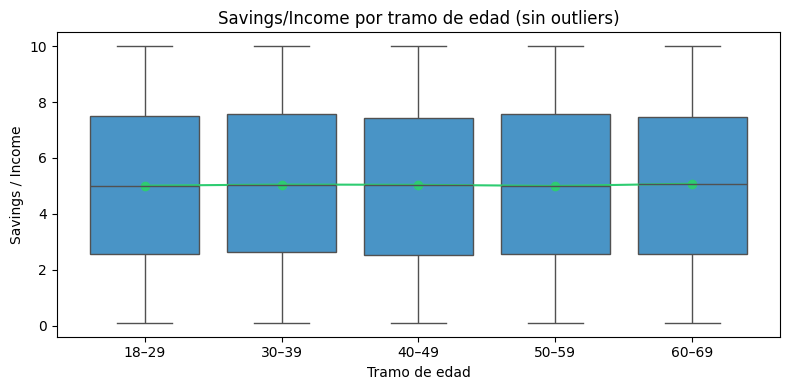

In [ ]:
bins   = [18, 30, 40, 50, 60, 70]
labels = ["18–29", "30–39", "40–49", "50–59", "60–69"]
df_as["age_bin"] = pd.cut(df_as["age"], bins=bins, right=False, labels=labels)

plt.figure(figsize=(8,4))
sns.boxplot(data=df_as, x="age_bin", y="savings_to_income_ratio",
            color=color_total, showfliers=False)
med = df_as.groupby("age_bin")["savings_to_income_ratio"].median()
plt.plot(range(len(med)), med.values, marker='o', color=color_activos)
plt.title("Savings/Income por tramo de edad (sin outliers)")
plt.xlabel("Tramo de edad"); plt.ylabel("Savings / Income")
plt.tight_layout(); plt.show()

# compara de forma robusta la mediana y la dispersión del ratio entre cohortes.

Los distintos grupos de edad muestran medianas y dispersiones muy similares, lo que indica un comportamiento de ahorro proporcional al ingreso bastante homogéneo.

#### C) Curva suavizada por edad (rolling por año)

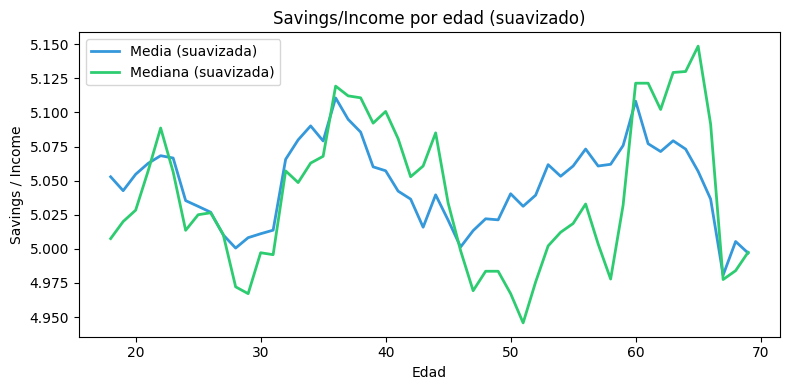

In [37]:
age_year = (df_as.groupby("age")["savings_to_income_ratio"]
            .agg(["mean","median"]).reset_index())

win = 7  # ventana de suavizado
age_year["mean_smooth"]   = age_year["mean"].rolling(win, center=True, min_periods=1).mean()
age_year["median_smooth"] = age_year["median"].rolling(win, center=True, min_periods=1).mean()

plt.figure(figsize=(8,4))
plt.plot(age_year["age"], age_year["mean_smooth"],   label="Media (suavizada)",   linewidth=2, color=color_total)
plt.plot(age_year["age"], age_year["median_smooth"], label="Mediana (suavizada)", linewidth=2, color=color_activos)
plt.title("Savings/Income por edad (suavizado)")
plt.xlabel("Edad"); plt.ylabel("Savings / Income")
plt.legend(); plt.tight_layout(); plt.show()

# detecta variaciones suaves año a año que no se ven en el boxplot.

La media y la mediana del ratio se mantienen estables en torno a 5, sin tendencia ascendente ni descendente clara a lo largo de las edades.

### 4.- age vs savings_usd

#### A) Dispersión global (muestra) + alternativa hexbin (toda la población)

El scatter enseña la nube; el hexbin resume densidad cuando hay muchos puntos. Además, uso escala log en el eje de ahorros para que la cola no “aplasté” el resto.

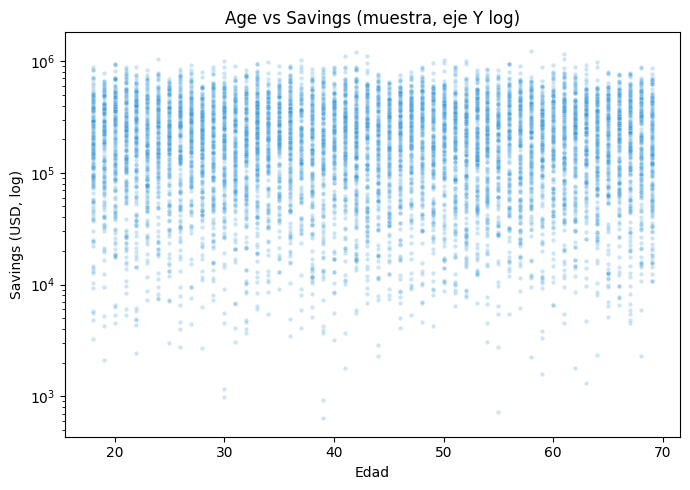

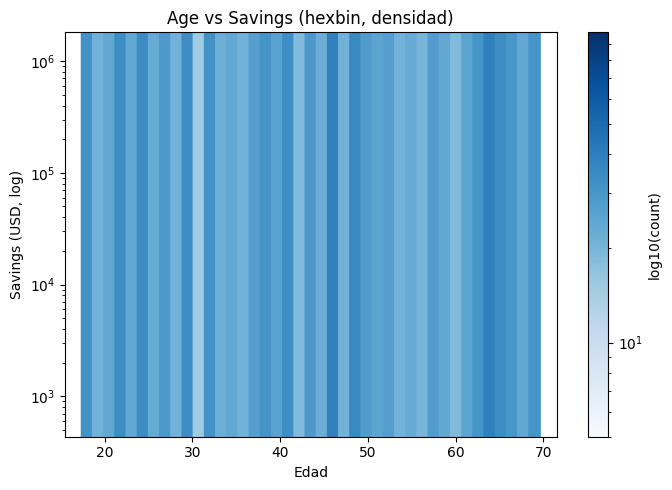

In [38]:
cols = ["age", "savings_usd"]
df_asu = (df[cols]
          .apply(pd.to_numeric, errors="coerce")
          .replace([np.inf, -np.inf], np.nan)
          .dropna())

# --- Scatter muestral con y en log ---
sample_n = min(len(df_asu), 8000)
sample_asu = df_asu.sample(sample_n, random_state=42)

plt.figure(figsize=(7,5))
sns.scatterplot(data=sample_asu, x="age", y="savings_usd",
                s=10, alpha=.25, color=color_total)
plt.yscale("log")  # ahorros muy asimétricos
plt.title("Age vs Savings (muestra, eje Y log)")
plt.xlabel("Edad"); plt.ylabel("Savings (USD, log)")
plt.tight_layout(); plt.show()

# --- Hexbin para toda la población (sin muestreo) ---
plt.figure(figsize=(7,5))
hb = plt.hexbin(df_asu["age"], df_asu["savings_usd"],
                gridsize=40, cmap="Blues", mincnt=5, bins='log')
plt.colorbar(hb, label='log10(count)')
plt.yscale("log")
plt.title("Age vs Savings (hexbin, densidad)")
plt.xlabel("Edad"); plt.ylabel("Savings (USD, log)")
plt.tight_layout(); plt.show()

Los ahorros se distribuyen de forma muy amplia, con una gran concentración entre 100.000 y 1.000.000 USD, sin tendencia clara por edad.

#### B) Boxplot por tramos de edad (medianas sobrepuestas)
Esto compara niveles típicos de ahorro por cohortes; mantengo eje log para ver bien las colas.

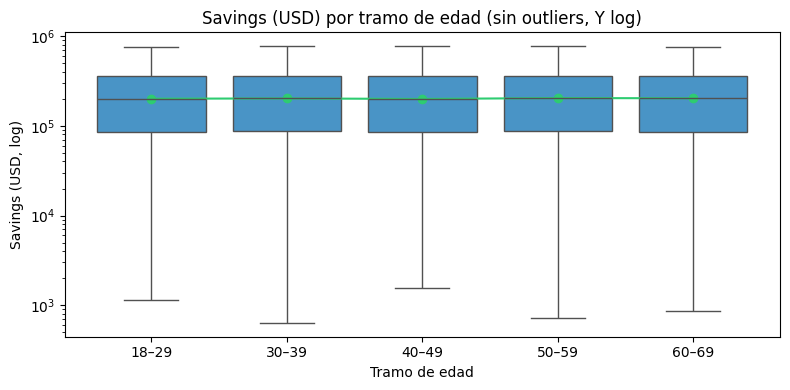

In [39]:
bins   = [18, 30, 40, 50, 60, 70]
labels = ["18–29", "30–39", "40–49", "50–59", "60–69"]
df_asu["age_bin"] = pd.cut(df_asu["age"], bins=bins, right=False, labels=labels)

plt.figure(figsize=(8,4))
sns.boxplot(data=df_asu, x="age_bin", y="savings_usd",
            color=color_total, showfliers=False)
plt.yscale("log")
med = df_asu.groupby("age_bin")["savings_usd"].median()
plt.plot(range(len(med)), med.values, marker='o', color=color_activos)
plt.title("Savings (USD) por tramo de edad (sin outliers, Y log)")
plt.xlabel("Tramo de edad"); plt.ylabel("Savings (USD, log)")
plt.tight_layout(); plt.show()

Los distintos grupos de edad presentan niveles de ahorro muy similares, con medianas en torno a 200.000 USD y una dispersión amplia.

#### C) Curva suavizada de media/mediana por edad

Esto representará la tendencia fina por año (sin asumir linealidad); útil para ver si el ahorro crece con la edad.

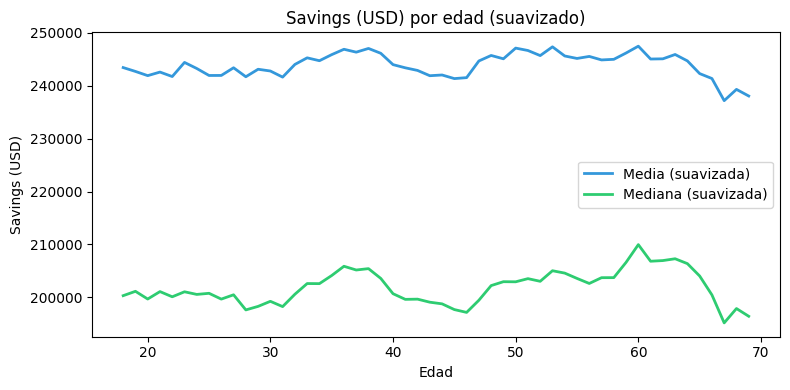

In [40]:
age_year = (df_asu.groupby("age")["savings_usd"]
            .agg(["mean","median"]).reset_index())

win = 7  # ventana de suavizado
age_year["mean_smooth"]   = age_year["mean"].rolling(win, center=True, min_periods=1).mean()
age_year["median_smooth"] = age_year["median"].rolling(win, center=True, min_periods=1).mean()

plt.figure(figsize=(8,4))
plt.plot(age_year["age"], age_year["mean_smooth"],   label="Media (suavizada)",   linewidth=2, color=color_total)
plt.plot(age_year["age"], age_year["median_smooth"], label="Mediana (suavizada)", linewidth=2, color=color_activos)
plt.title("Savings (USD) por edad (suavizado)")
plt.xlabel("Edad"); plt.ylabel("Savings (USD)")
plt.legend(); plt.tight_layout(); plt.show()

Tanto la media como la mediana se mantienen estables alrededor de 240.000 y 200.000 USD, sin incremento notable con la edad.

## 4.2.- Género

### 1.- gender vs debt_to_income_ratio

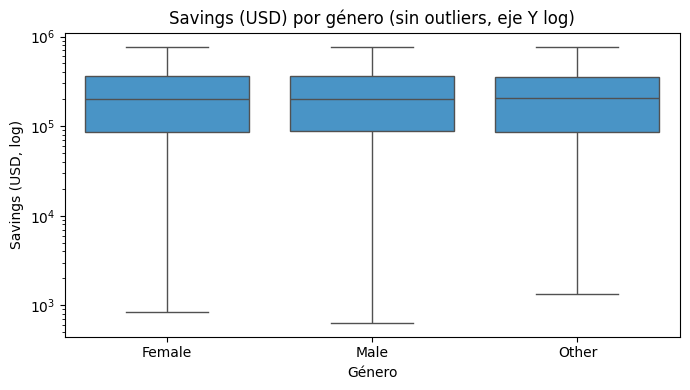

In [ ]:
# El boxplot sintetiza posición (mediana) y dispersión; eje log evita que la cola “aplane” el resto.
# Subconjunto limpio
cols = ["gender", "savings_usd"]
df_gs = (df[cols]
         .assign(gender=lambda d: d["gender"].astype("category"))
         .apply(pd.to_numeric, errors="ignore")  # solo convierte savings_usd
         .replace([np.inf, -np.inf], np.nan)
         .dropna())

plt.figure(figsize=(7,4))
sns.boxplot(data=df_gs, x="gender", y="savings_usd",
            color=color_total, showfliers=False)
plt.yscale("log")
plt.title("Savings (USD) por género (sin outliers, eje Y log)")
plt.xlabel("Género"); plt.ylabel("Savings (USD, log)")
plt.tight_layout(); plt.show()

In [42]:
resumen_gs = (df_gs.groupby("gender")["savings_usd"]
              .agg(media="mean", mediana="median", n="count")
              .round(2)
             )
resumen_gs

,media,mediana,n
gender,,,
Female,243677.75,201723.58,15550
Male,243822.44,201272.19,15595
Other,243796.81,204654.09,1279


Los "tres" géneros presentan niveles de ahorro casi idénticos, con medianas cercanas a 200.000 USD y medias alrededor de 243.000 USD.
No se observan diferencias importantes por género en el nivel de ahorro acumulado.

### 2.- gender vs savings_to_income_ratio

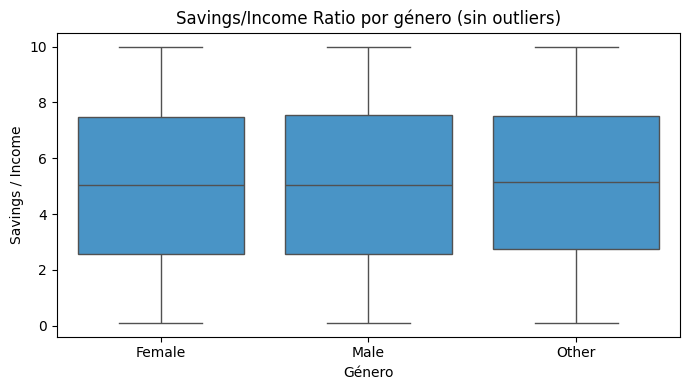

In [43]:
# Subconjunto limpio
cols = ["gender", "savings_to_income_ratio"]
df_gsir = (df[cols]
           .assign(gender=lambda d: d["gender"].astype("category"))
           .apply(pd.to_numeric, errors="ignore")
           .replace([np.inf, -np.inf], np.nan)
           .dropna())

plt.figure(figsize=(7,4))
sns.boxplot(data=df_gsir, x="gender", y="savings_to_income_ratio",
            color=color_total, showfliers=False)
plt.title("Savings/Income Ratio por género (sin outliers)")
plt.xlabel("Género"); plt.ylabel("Savings / Income")
plt.tight_layout(); plt.show()

Gráfico comparativo tipo “ARPU”

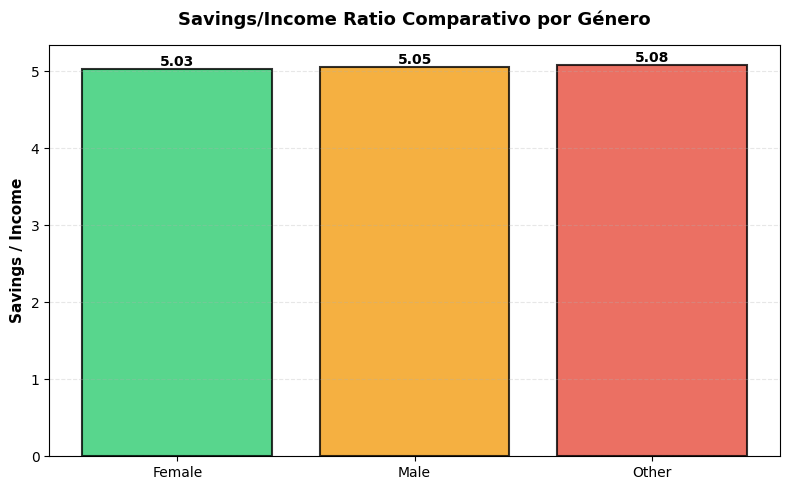

In [48]:
# Subconjunto limpio
cols = ["gender", "savings_to_income_ratio"]
df_gsir = (df[cols]
           .assign(gender=lambda d: d["gender"].astype("category"))
           .apply(pd.to_numeric, errors="ignore")
           .replace([np.inf, -np.inf], np.nan)
           .dropna())

# Calcular medias por género
mean_ratio = df_gsir.groupby("gender")["savings_to_income_ratio"].mean().round(2)

# Configurar gráfico
plt.figure(figsize=(8, 5))
categories = mean_ratio.index.tolist()
values = mean_ratio.values
colors_bar = [color_activos, color_extra1, color_churned]  # verde, naranja, rojo

bars = plt.bar(categories, values, color=colors_bar, alpha=0.8,
               edgecolor='black', linewidth=1.5)

plt.ylabel('Savings / Income', fontweight='bold', fontsize=11)
plt.title('Savings/Income Ratio Comparativo por Género', fontweight='bold', fontsize=13, pad=15)
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Etiquetas sobre las barras
for bar, val in zip(bars, values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{val:.2f}',
             ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()

In [44]:
resumen_gsir = (df_gsir.groupby("gender")["savings_to_income_ratio"]
                .agg(media="mean", mediana="median", n="count")
                .round(2)
               )
resumen_gsir

,media,mediana,n
gender,,,
Female,5.03,5.03,15550
Male,5.05,5.04,15595
Other,5.08,5.14,1279


Los tres géneros presentan niveles muy similares de ahorro relativo al ingreso, con medias y medianas en torno a 5.

Las diferencias entre grupos son mínimas, lo que indica una distribución homogénea del comportamiento de ahorro independientemente del género.

Tanto los boxplots como el gráfico comparativo confirman que no existe una tendencia destacada ni mayor variabilidad en ninguno de los tres grupos.

### 3.- gender vs credit_score

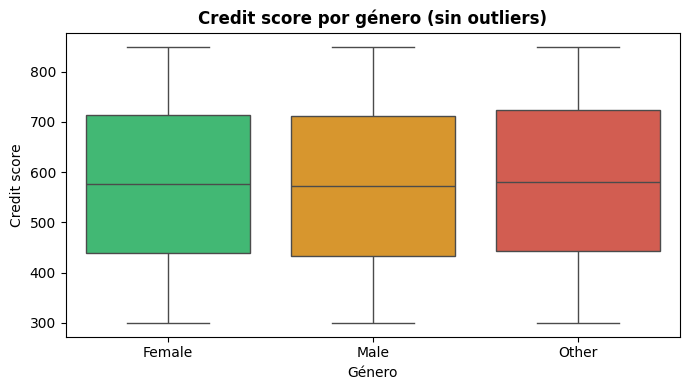

In [49]:
# Subconjunto limpio
cols = ["gender", "credit_score"]
df_gc = (df[cols]
         .assign(gender=lambda d: d["gender"].astype("category"))
         .apply(pd.to_numeric, errors="ignore")
         .replace([np.inf, -np.inf], np.nan)
         .dropna())

# Orden (por si quieres mantener Female, Male, Other)
orden = ["Female", "Male", "Other"]
df_gc["gender"] = pd.Categorical(df_gc["gender"], categories=orden, ordered=True)

plt.figure(figsize=(7,4))
sns.boxplot(data=df_gc, x="gender", y="credit_score",
            order=orden,
            showfliers=False,
            palette=[color_activos, color_extra1, color_churned])  # verde, naranja, rojo
plt.title("Credit score por género (sin outliers)", fontweight='bold')
plt.xlabel("Género"); plt.ylabel("Credit score")
plt.tight_layout(); plt.show()

         media  mediana      n
gender                        
Female  576.82    577.0  15550
Male    573.13    572.0  15595
Other   582.28    581.0   1279


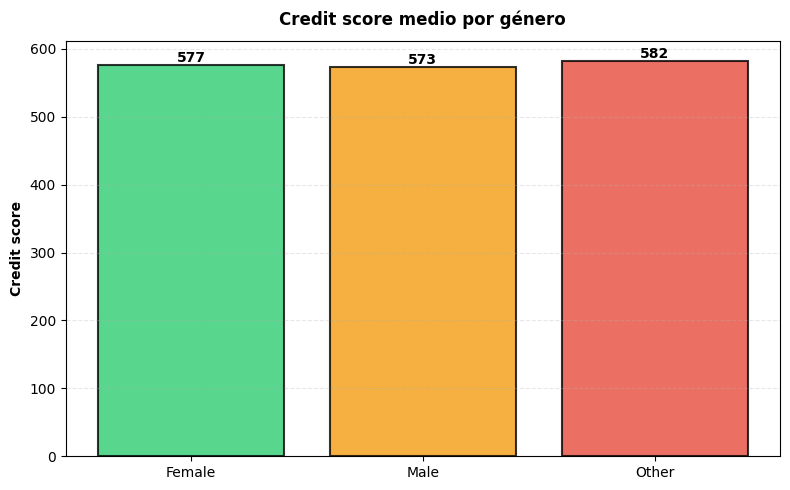

In [50]:
# Tabla resumen
resumen_gc = (df_gc.groupby("gender")["credit_score"]
              .agg(media="mean", mediana="median", n="count")
              .round(2))
print(resumen_gc)

# Barra comparativa
plt.figure(figsize=(8,5))
cats = resumen_gc.index.tolist()
vals = resumen_gc["media"].values
colors_bar = [color_activos, color_extra1, color_churned]

bars = plt.bar(cats, vals, color=colors_bar, alpha=0.8,
               edgecolor='black', linewidth=1.5)
plt.ylabel('Credit score', fontweight='bold')
plt.title('Credit score medio por género', fontweight='bold', pad=12)
plt.grid(axis='y', alpha=0.3, linestyle='--')

for b, v in zip(bars, vals):
    plt.text(b.get_x() + b.get_width()/2., b.get_height(),
             f'{v:.0f}', ha='center', va='bottom', fontweight='bold')
plt.tight_layout(); plt.show()

El credit score medio y mediano es muy parecido entre los tres géneros, con valores entre 572 y 582 puntos.

Las mujeres presentan una ligera ventaja en la mediana, mientras que el grupo “Other” obtiene el promedio más alto.

### 4.- gender vs savings_usd

#### A) Boxplot por género (Y log)

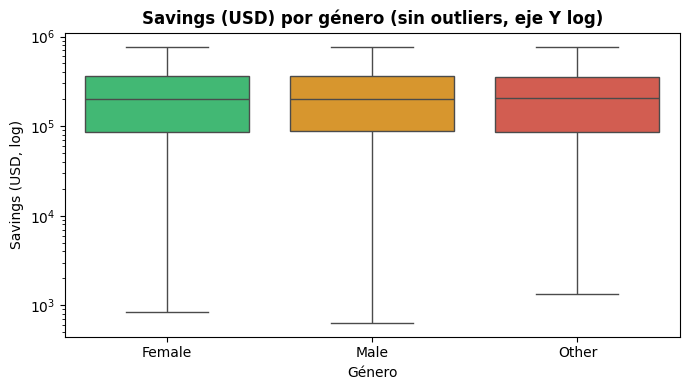

In [51]:
# Subconjunto limpio
cols = ["gender", "savings_usd"]
df_gs = (df[cols]
         .assign(gender=lambda d: d["gender"].astype("category"))
         .apply(pd.to_numeric, errors="ignore")
         .replace([np.inf, -np.inf], np.nan)
         .dropna())

# Orden opcional
orden = ["Female", "Male", "Other"]
df_gs["gender"] = pd.Categorical(df_gs["gender"], categories=orden, ordered=True)

plt.figure(figsize=(7,4))
sns.boxplot(data=df_gs, x="gender", y="savings_usd",
            order=orden, showfliers=False,
            palette=[color_activos, color_extra1, color_churned])
plt.yscale("log")
plt.title("Savings (USD) por género (sin outliers, eje Y log)", fontweight='bold')
plt.xlabel("Género"); plt.ylabel("Savings (USD, log)")
plt.tight_layout(); plt.show()

Las distribuciones de ahorro por género son muy similares; las medianas y la dispersión se solapan casi por completo.

#### B) Barras comparativas: media y mediana por género (estilo ARPU)

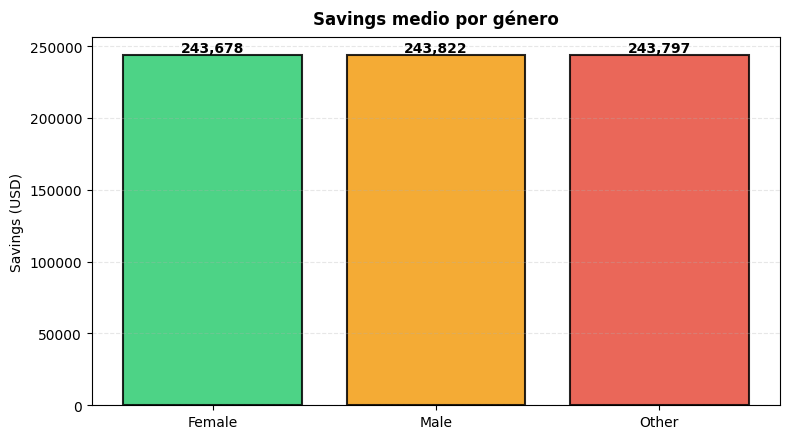

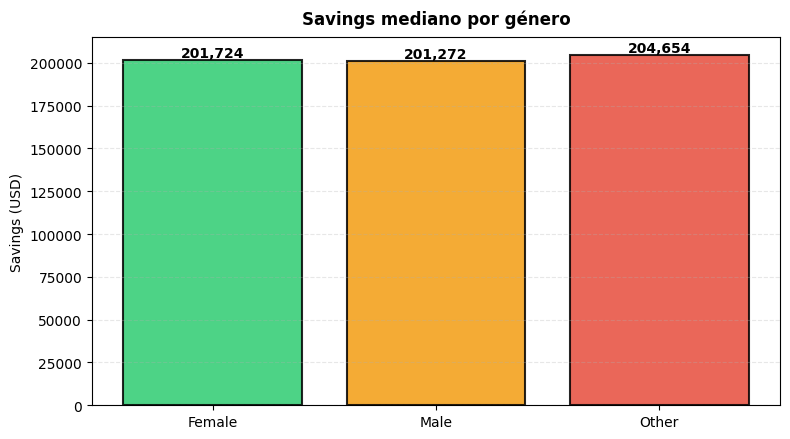

            media    mediana      n
gender                             
Female  243677.75  201723.58  15550
Male    243822.44  201272.19  15595
Other   243796.81  204654.09   1279


In [52]:
# Resumen por género
resumen = (df_gs.groupby("gender")["savings_usd"]
           .agg(media="mean", mediana="median", n="count")
           .round(2))

# --- Media ---
plt.figure(figsize=(8,4.5))
cats = resumen.index.tolist()
vals = resumen["media"].values
colors_bar = [color_activos, color_extra1, color_churned]

bars = plt.bar(cats, vals, color=colors_bar, alpha=0.85,
               edgecolor='black', linewidth=1.5)
plt.title("Savings medio por género", fontweight='bold', pad=10)
plt.ylabel("Savings (USD)")
plt.grid(axis='y', alpha=0.3, linestyle='--')
for b, v in zip(bars, vals):
    plt.text(b.get_x() + b.get_width()/2., b.get_height(),
             f'{v:,.0f}', ha='center', va='bottom', fontweight='bold')
plt.tight_layout(); plt.show()

# --- Mediana ---
plt.figure(figsize=(8,4.5))
vals_med = resumen["mediana"].values
bars = plt.bar(cats, vals_med, color=colors_bar, alpha=0.85,
               edgecolor='black', linewidth=1.5)
plt.title("Savings mediano por género", fontweight='bold', pad=10)
plt.ylabel("Savings (USD)")
plt.grid(axis='y', alpha=0.3, linestyle='--')
for b, v in zip(bars, vals_med):
    plt.text(b.get_x() + b.get_width()/2., b.get_height(),
             f'{v:,.0f}', ha='center', va='bottom', fontweight='bold')
plt.tight_layout(); plt.show()

# (Opcional) mostrar la tabla en consola
print(resumen)

Las medias (243k USD) y medianas (201–205k USD) son prácticamente iguales entre géneros; “Other” muestra una mediana apenas superior.

#### C) % de personas por umbrales de ahorro

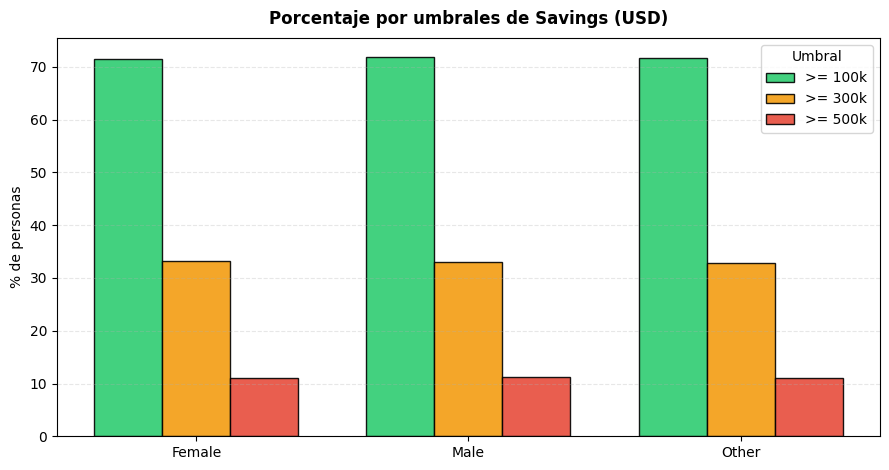

,>= 100k,>= 300k,>= 500k
gender,,,
Female,71.48,33.17,11.07
Male,71.89,33.07,11.30
Other,71.62,32.76,11.02


In [53]:
# Define umbrales que tengan sentido en tu dataset
thresholds = [100_000, 300_000, 500_000]

pct_df = []
for t in thresholds:
    tmp = (df_gs.assign(above=lambda d: d["savings_usd"] >= t)
           .groupby("gender")["above"].mean()
           .mul(100).rename(f">= {t/1000:.0f}k"))
    pct_df.append(tmp)

pct_df = pd.concat(pct_df, axis=1).reindex(orden)

# Barras agrupadas por umbral
plt.figure(figsize=(9,4.8))
width = 0.25
x = np.arange(len(pct_df.index))
for i, col in enumerate(pct_df.columns):
    vals = pct_df[col].values
    color = [color_activos, color_extra1, color_churned][i % 3]
    plt.bar(x + i*width - width, vals, width=width, label=col,
            color=color, alpha=0.9, edgecolor='black', linewidth=1.0)

plt.xticks(x, pct_df.index)
plt.ylabel("% de personas")
plt.title("Porcentaje por umbrales de Savings (USD)", fontweight='bold', pad=10)
plt.legend(title="Umbral")
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout(); plt.show()

# (Opcional) ver la tabla
pct_df.round(2)

Los porcentajes por umbral (≥100k =71–72%, ≥300k =33%, ≥500k =11%) son casi idénticos entre géneros; no se observan diferencias relevantes.

## 4.3.- Nivel de Estudios.

### 1.- education_level vs debt_to_income_ratio

#### A) Boxplot por education_level (DTI recortado al p99)

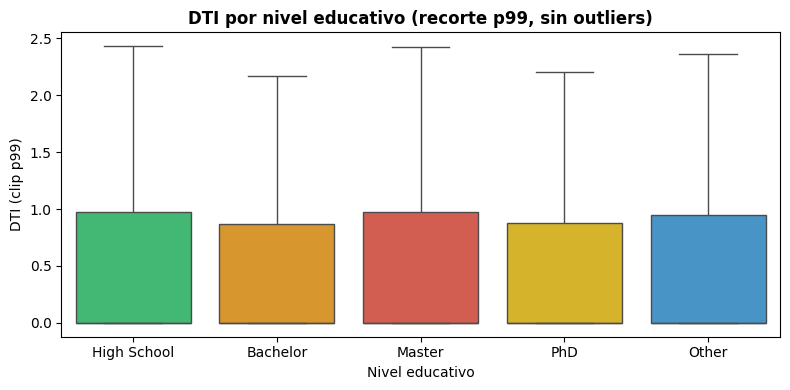

In [54]:
# Subconjunto y orden lógico de niveles
orden_ed = ["High School", "Bachelor", "Master", "PhD", "Other"]
cols = ["education_level", "debt_to_income_ratio"]
df_ed = (df[cols]
         .rename(columns={"education_level":"edu", "debt_to_income_ratio":"DTI"})
         .replace([np.inf, -np.inf], np.nan)
         .dropna())
df_ed["edu"] = pd.Categorical(df_ed["edu"], categories=orden_ed, ordered=True)

# Recorte al p99 para ver el patrón central
p99 = df_ed["DTI"].quantile(0.99)
df_box = df_ed.assign(DTI_clip = df_ed["DTI"].clip(upper=p99))

plt.figure(figsize=(8,4))
sns.boxplot(data=df_box, x="edu", y="DTI_clip",
            order=orden_ed, showfliers=False,
            palette=[color_activos, color_extra1, color_churned, color_extra2, color_total])
plt.title("DTI por nivel educativo (recorte p99, sin outliers)", fontweight='bold')
plt.xlabel("Nivel educativo"); plt.ylabel("DTI (clip p99)")
plt.tight_layout(); plt.show()

Las distribuciones del DTI son muy parecidas entre niveles educativos, sin diferencias claras en mediana ni dispersión.

#### B) % de personas con deuda (DTI>0) por nivel

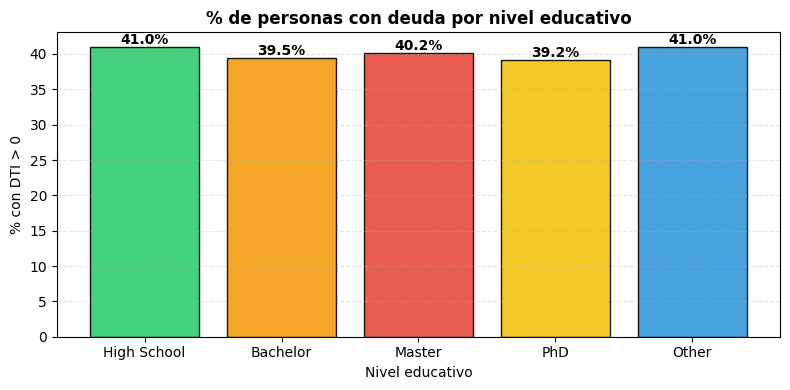

In [55]:
pct_deuda = (df_ed.assign(has_debt = df_ed["DTI"] > 0)
             .groupby("edu")["has_debt"].mean()
             .reindex(orden_ed)
             .mul(100))

plt.figure(figsize=(8,4))
bars = plt.bar(pct_deuda.index.astype(str), pct_deuda.values,
               color=[color_activos, color_extra1, color_churned, color_extra2, color_total],
               alpha=0.9, edgecolor='black', linewidth=1.0)
plt.title("% de personas con deuda por nivel educativo", fontweight='bold')
plt.ylabel("% con DTI > 0"); plt.xlabel("Nivel educativo")
plt.grid(axis='y', alpha=.3, linestyle='--')
for b,v in zip(bars, pct_deuda.values):
    plt.text(b.get_x()+b.get_width()/2., v, f"{v:.1f}%", ha='center', va='bottom', fontweight='bold')
plt.tight_layout(); plt.show()

Cerca del 40% de las personas en todos los niveles educativos tienen alguna deuda, mostrando una tendencia muy uniforme.

#### C) Mediana de DTI entre deudores (solo DTI>0) por nivel

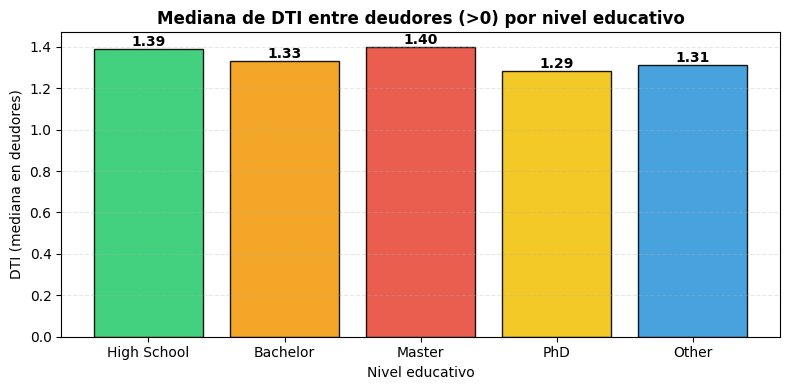

In [56]:
df_debtors = df_ed[df_ed["DTI"] > 0].copy()
med_debtors = (df_debtors.groupby("edu")["DTI"]
               .median()
               .reindex(orden_ed))

plt.figure(figsize=(8,4))
bars = plt.bar(med_debtors.index.astype(str), med_debtors.values,
               color=[color_activos, color_extra1, color_churned, color_extra2, color_total],
               alpha=0.9, edgecolor='black', linewidth=1.0)
plt.title("Mediana de DTI entre deudores (>0) por nivel educativo", fontweight='bold')
plt.ylabel("DTI (mediana en deudores)"); plt.xlabel("Nivel educativo")
plt.grid(axis='y', alpha=.3, linestyle='--')
for b,v in zip(bars, med_debtors.values):
    plt.text(b.get_x()+b.get_width()/2., v, f"{v:.2f}", ha='center', va='bottom', fontweight='bold')
plt.tight_layout(); plt.show()

Entre quienes tienen deuda, las medianas de DTI oscilan entre 1.29 y 1.40, lo que indica que el nivel educativo no influye significativamente en la proporción de deuda respecto al ingreso.

### 2.- education_level vs savings_to_income_ratio

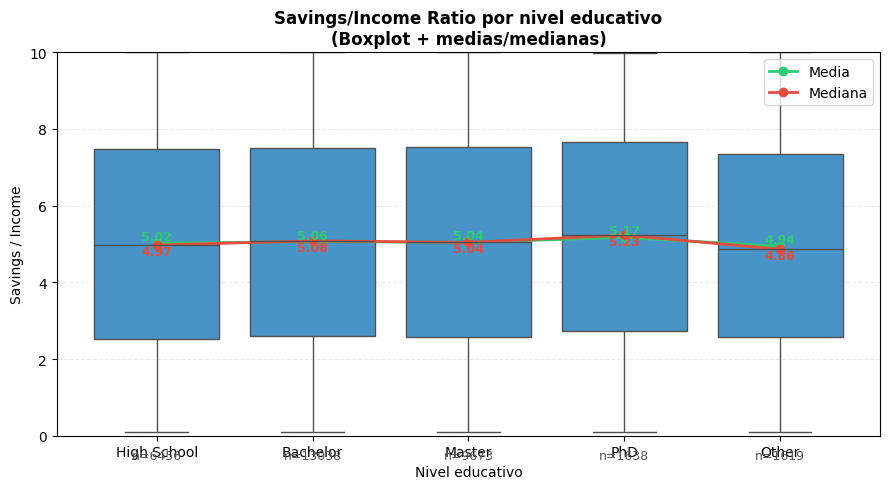

,media,mediana,n
edu,,,
High School,5.02,4.97,6456
Bachelor,5.06,5.08,13038
Master,5.04,5.04,9673
PhD,5.17,5.23,1638
Other,4.94,4.86,1619


In [ ]:
# --- Datos y orden lógico ---
orden_ed = ["High School", "Bachelor", "Master", "PhD", "Other"]
cols = ["education_level", "savings_to_income_ratio"]
df_esir = (df[cols]
           .rename(columns={"education_level":"edu", "savings_to_income_ratio":"SIR"})
           .replace([np.inf, -np.inf], np.nan)
           .dropna())
df_esir["edu"] = pd.Categorical(df_esir["edu"], categories=orden_ed, ordered=True)

# --- Gráfico único: Boxplot + medias/medianas superpuestas ---
plt.figure(figsize=(9,5))
sns.boxplot(data=df_esir, x="edu", y="SIR",
            order=orden_ed, showfliers=False, color=color_total)
plt.ylim(0, 10)  # el ratio está acotado 0–10
plt.grid(axis='y', alpha=.25, linestyle='--')

# Cálculos por grupo
stats = (df_esir.groupby("edu")["SIR"]
         .agg(media="mean", mediana="median", n="count")
         .reindex(orden_ed)
         .round(2))

# Posiciones X para superponer puntos/lineas
xpos = np.arange(len(stats))

# Medias (verde) y Medianas (rojo)
plt.plot(xpos, stats["media"].values,   marker='o', linewidth=2.0, color=color_activos,  label="Media")
plt.plot(xpos, stats["mediana"].values, marker='o', linewidth=2.0, color=color_churned, label="Mediana")

# Etiquetas numéricas sobre los puntos
for i, (m, md) in enumerate(zip(stats["media"], stats["mediana"])):
    plt.text(i, m,  f"{m:.2f}",  ha='center', va='bottom', fontsize=9, color=color_activos, fontweight='bold')
    plt.text(i, md, f"{md:.2f}", ha='center', va='top',    fontsize=9, color=color_churned,  fontweight='bold')

# (Opcional) muestra tamaño de muestra bajo cada tick
for i, n in enumerate(stats["n"]):
    plt.text(i, -0.35, f"n={n}", ha='center', va='top', fontsize=9, color="#555")

plt.title("Savings/Income Ratio por nivel educativo\n(Boxplot + medias/medianas)", fontweight='bold')
plt.xlabel("Nivel educativo"); plt.ylabel("Savings / Income")
plt.legend(loc="upper right")
plt.tight_layout(); plt.show()

# Ver la tabla
stats

Los ratios de ahorro sobre ingreso son muy similares en todos los niveles educativos, con medias y medianas cercanas a 5.

El grupo con doctorado (PhD) muestra un ahorro ligeramente mayor, pero la diferencia es mínima y no significativa.

En general, el nivel educativo no parece influir de forma clara en la proporción de ahorro respecto a los ingresos.

### 3.- education_level vs credit_score

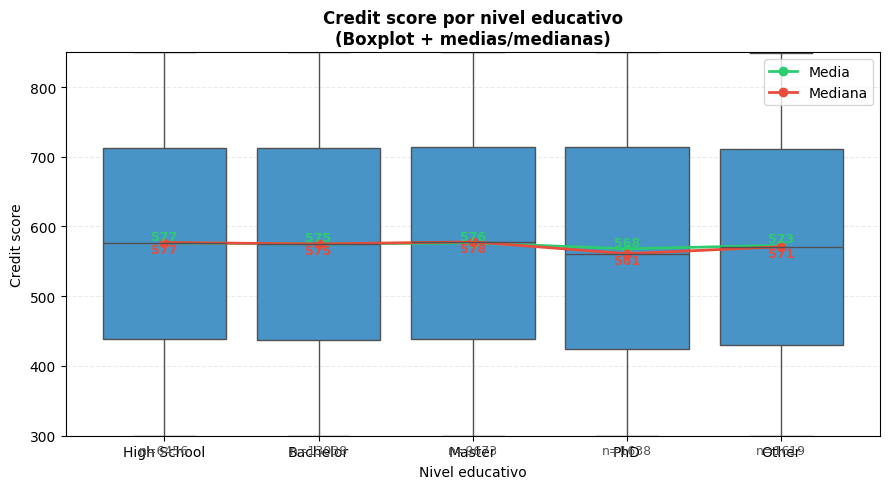

,media,mediana,n
edu,,,
High School,576.54,577.0,6456
Bachelor,574.99,575.0,13038
Master,576.37,578.0,9673
PhD,568.09,561.0,1638
Other,572.94,571.0,1619


In [58]:
# --- Datos y orden lógico ---
orden_ed = ["High School", "Bachelor", "Master", "PhD", "Other"]
cols = ["education_level", "credit_score"]
df_ecs = (df[cols]
          .rename(columns={"education_level":"edu", "credit_score":"score"})
          .replace([np.inf, -np.inf], np.nan)
          .dropna())
df_ecs["edu"] = pd.Categorical(df_ecs["edu"], categories=orden_ed, ordered=True)

# --- Gráfico único: Boxplot + medias/medianas ---
plt.figure(figsize=(9,5))
sns.boxplot(data=df_ecs, x="edu", y="score",
            order=orden_ed, showfliers=False, color=color_total)

# Rango típico de credit score
plt.ylim(300, 850)
plt.grid(axis='y', alpha=.25, linestyle='--')

# Cálculos por grupo
stats = (df_ecs.groupby("edu")["score"]
         .agg(media="mean", mediana="median", n="count")
         .reindex(orden_ed)
         .round(2))

# Puntos/lineas de media y mediana
xpos = np.arange(len(stats))
plt.plot(xpos, stats["media"].values,   marker='o', linewidth=2.0, color=color_activos,  label="Media")
plt.plot(xpos, stats["mediana"].values, marker='o', linewidth=2.0, color=color_churned, label="Mediana")

# Etiquetas de valores sobre los puntos
for i, (m, md) in enumerate(zip(stats["media"], stats["mediana"])):
    plt.text(i, m,  f"{m:.0f}",  ha='center', va='bottom', fontsize=9, color=color_activos, fontweight='bold')
    plt.text(i, md, f"{md:.0f}", ha='center', va='top',    fontsize=9, color=color_churned,  fontweight='bold')

# Tamaño de muestra bajo cada tick
for i, n in enumerate(stats["n"]):
    plt.text(i, 300-12, f"n={n}", ha='center', va='top', fontsize=9, color="#555")

plt.title("Credit score por nivel educativo\n(Boxplot + medias/medianas)", fontweight='bold')
plt.xlabel("Nivel educativo"); plt.ylabel("Credit score")
plt.legend(loc="upper right")
plt.tight_layout(); plt.show()

# Ver la tabla en consola
stats

Los distintos niveles educativos muestran puntajes crediticios muy similares, con medias/medianas cercanas a 575–578.

El grupo PhD aparece ligeramente por debajo (media ~568; mediana ~561), pero la diferencia es pequeña respecto al resto.

En conjunto, el nivel de estudios no parece ser un factor determinante del credit score en este dataset.

La interpretación se basa en las líneas de media/mediana superpuestas y en la superposición de los boxplots entre categorías.

### 4.- education_level vs savings_usd

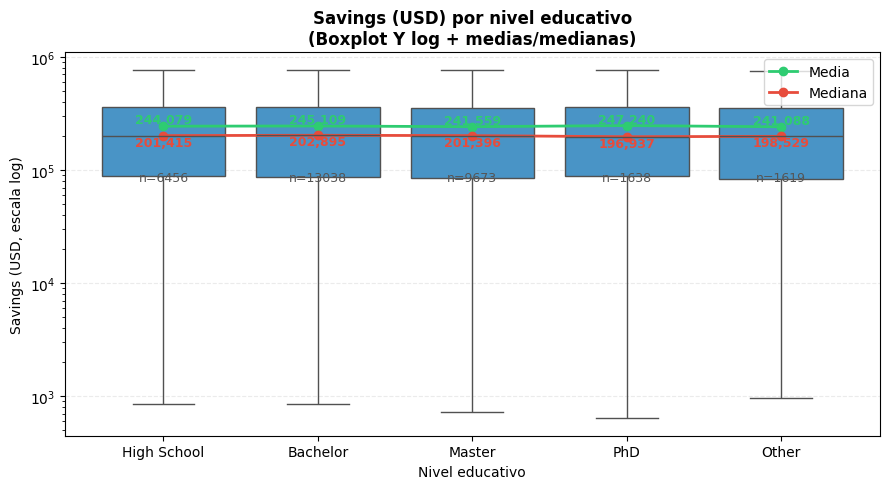

,media,mediana,n
edu,,,
High School,244079.0,201415.0,6456
Bachelor,245109.0,202895.0,13038
Master,241559.0,201396.0,9673
PhD,247240.0,196937.0,1638
Other,241088.0,198529.0,1619


In [59]:
# --- Datos y orden lógico ---
orden_ed = ["High School", "Bachelor", "Master", "PhD", "Other"]
cols = ["education_level", "savings_usd"]
df_es = (df[cols]
         .rename(columns={"education_level":"edu", "savings_usd":"savings"})
         .replace([np.inf, -np.inf], np.nan)
         .dropna())
df_es["edu"] = pd.Categorical(df_es["edu"], categories=orden_ed, ordered=True)

# --- Gráfico único: Boxplot (Y log) + medias/medianas superpuestas ---
plt.figure(figsize=(9,5))
sns.boxplot(data=df_es, x="edu", y="savings",
            order=orden_ed, showfliers=False, color= color_total)
plt.yscale("log")                              # ahorros muy asimétricos
plt.grid(axis='y', alpha=.25, linestyle='--')

# Cálculos por grupo
stats = (df_es.groupby("edu")["savings"]
         .agg(media="mean", mediana="median", n="count")
         .reindex(orden_ed)
         .round(0))    # redondeo legible para USD

# Puntos/lineas de media y mediana
xpos = np.arange(len(stats))
plt.plot(xpos, stats["media"].values,   marker='o', linewidth=2.0,
         color=color_activos,  label="Media")
plt.plot(xpos, stats["mediana"].values, marker='o', linewidth=2.0,
         color=color_churned, label="Mediana")

# Etiquetas numéricas sobre los puntos (formato miles)
for i, (m, md) in enumerate(zip(stats["media"], stats["mediana"])):
    plt.text(i, m,  f"{m:,.0f}",  ha='center', va='bottom', fontsize=9,
             color=color_activos, fontweight='bold')
    plt.text(i, md, f"{md:,.0f}", ha='center', va='top',    fontsize=9,
             color=color_churned,  fontweight='bold')

# Tamaño de muestra bajo cada tick
for i, n in enumerate(stats["n"]):
    plt.text(i, stats["mediana"].min()/2, f"n={n}", ha='center', va='top',
             fontsize=9, color="#555")  # se coloca bajo para no tapar cajas

plt.title("Savings (USD) por nivel educativo\n(Boxplot Y log + medias/medianas)", fontweight='bold')
plt.xlabel("Nivel educativo"); plt.ylabel("Savings (USD, escala log)")
plt.legend(loc="upper right")
plt.tight_layout(); plt.show()

# Ver la tabla
stats

Los niveles educativos presentan valores de ahorro medios y medianos muy similares, entre 240k USD y 247k USD.

Las pequeñas variaciones observadas no indican una tendencia clara: el nivel educativo no parece influir significativamente en el monto total ahorrado.

El uso de escala log confirma que las distribuciones de ahorro son parecidas y con una dispersión similar entre todos los grupos.

## 4.4- Región

### 1.- region vs debt_to_income_ratio

#### A) Boxplot de DTI por región (clip p99)

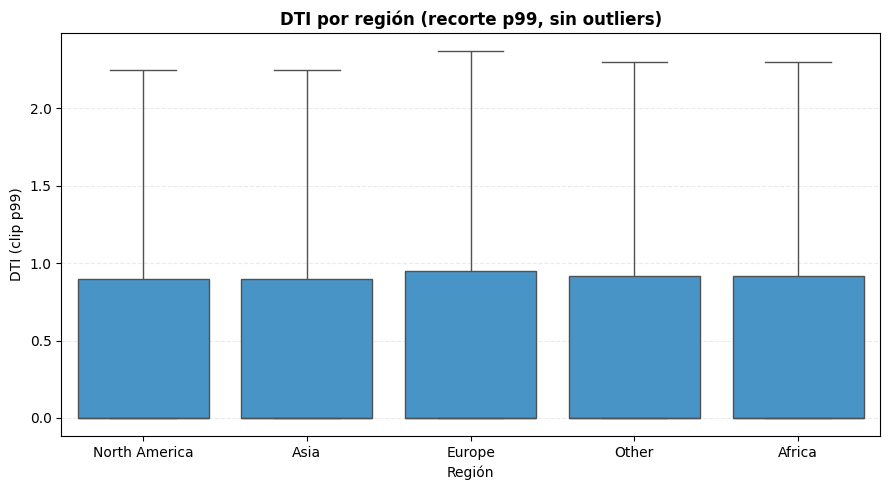

In [62]:
plt.figure(figsize=(9,5))
sns.boxplot(data=df_r, x="region", y="DTI_clip",
            order=orden, showfliers=False, color=color_total)
plt.title("DTI por región (recorte p99, sin outliers)", fontweight='bold')
plt.xlabel("Región"); plt.ylabel("DTI (clip p99)")
plt.grid(axis='y', alpha=.25, linestyle='--')
plt.tight_layout(); plt.show()

Las distribuciones son muy similares entre regiones: IQR y rangos casi idénticos y mediana ≈ 0 en todas (mayoría sin deuda).

No se aprecia una diferencia práctica en la intensidad del DTI por región.

#### B) % de personas con deuda (DTI>0) por región

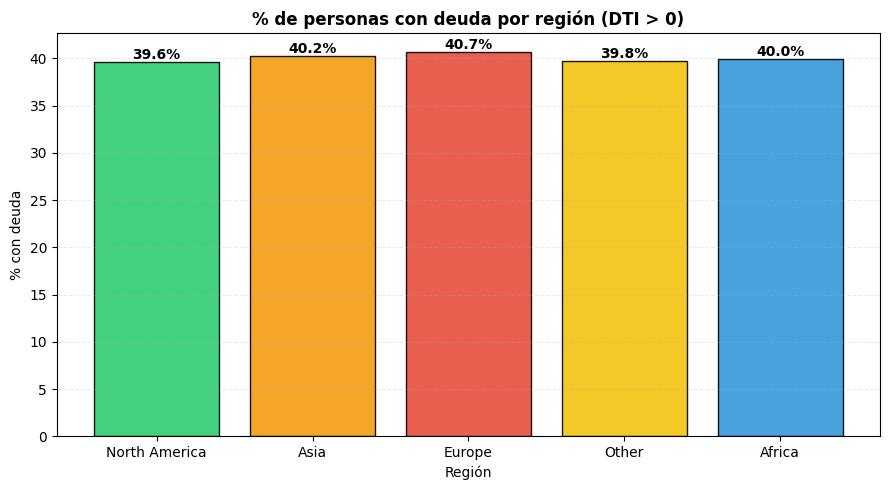

In [63]:
plt.figure(figsize=(9,5))
bars = plt.bar(stats.index.astype(str), stats["pct_deuda"].values,
               color=[color_activos, color_extra1, color_churned, color_extra2, color_total][:len(stats)],
               edgecolor='black', linewidth=1, alpha=.9)
plt.title("% de personas con deuda por región (DTI > 0)", fontweight='bold')
plt.ylabel("% con deuda"); plt.xlabel("Región")
plt.grid(axis='y', alpha=.25, linestyle='--')
for b,v in zip(bars, stats["pct_deuda"].values):
    plt.text(b.get_x()+b.get_width()/2, v, f"{v:.1f}%", ha='center', va='bottom', fontweight='bold')
plt.tight_layout(); plt.show()

Los porcentajes están muy parejos (39.6–40.7%); Europa es levemente mayor (=40.7%) y North America la menor (=39.6%).

Conclusión: la prevalencia de deuda no varía de forma relevante entre regiones.

#### C) Medias y medianas de DTI por región (barras agrupadas)

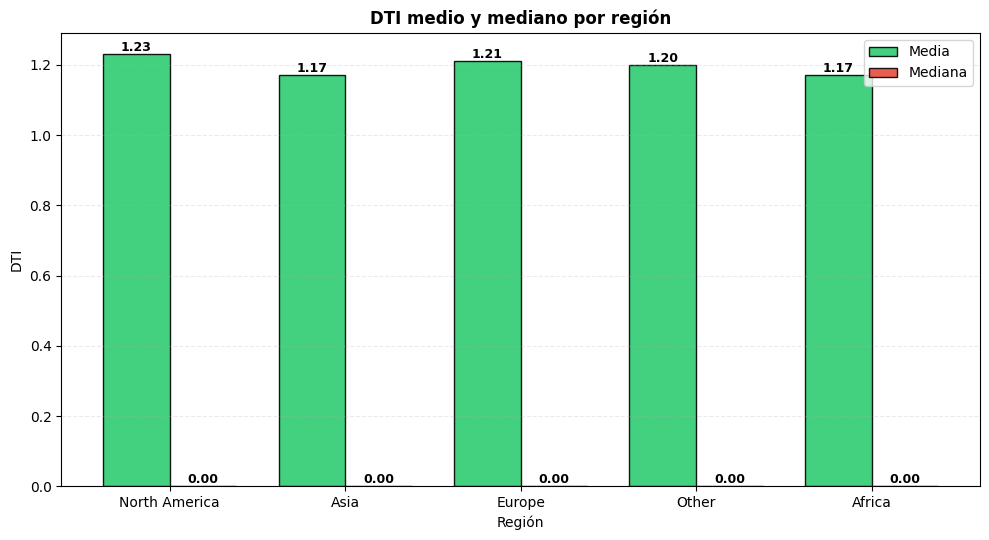

,media,mediana,pct_deuda,n
region,,,,
North America,1.23,0.0,39.58,6581
Asia,1.17,0.0,40.24,6551
Europe,1.21,0.0,40.68,6519
Other,1.20,0.0,39.77,6407
Africa,1.17,0.0,39.96,6366


In [64]:
x = np.arange(len(stats))
w = 0.38

plt.figure(figsize=(10,5.5))
plt.bar(x - w/2, stats["media"].values, width=w, color=color_activos,
        edgecolor='black', linewidth=1, label="Media", alpha=.9)
plt.bar(x + w/2, stats["mediana"].values, width=w, color=color_churned,
        edgecolor='black', linewidth=1, label="Mediana", alpha=.9)

plt.xticks(x, stats.index.astype(str))
plt.title("DTI medio y mediano por región", fontweight='bold')
plt.ylabel("DTI"); plt.xlabel("Región")
plt.legend()
plt.grid(axis='y', alpha=.25, linestyle='--')

# Etiquetas
for xi, v in zip(x - w/2, stats["media"].values):
    plt.text(xi, v, f"{v:.2f}", ha='center', va='bottom', fontsize=9, fontweight='bold')
for xi, v in zip(x + w/2, stats["mediana"].values):
    plt.text(xi, v, f"{v:.2f}", ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout(); plt.show()

# (Opcional) ver la tabla en consola
stats

Las medianas son 0.00 en todas (refuerza que muchos no tienen deuda); las medias van de 1.17 a 1.23, con North America ligeramente más alta.

### 2.- region vs savings_to_income_ratio

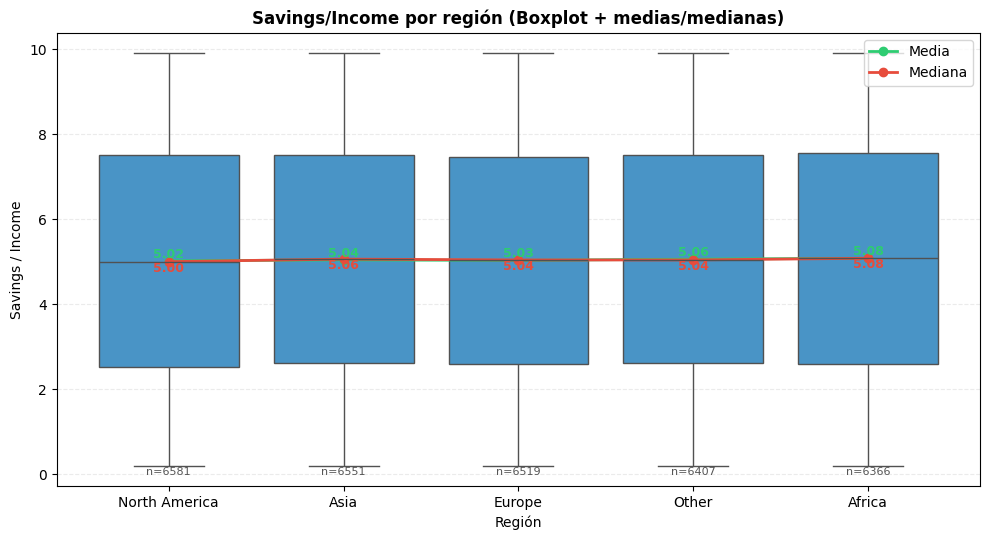

,media,mediana,n
region,,,
North America,5.02,5.00,6581
Asia,5.04,5.06,6551
Europe,5.03,5.04,6519
Other,5.06,5.04,6407
Africa,5.08,5.08,6366


In [67]:
# --- Preparación de datos ---
cols = ["region", "savings_to_income_ratio"]
df_rs = (df[cols]
         .rename(columns={"savings_to_income_ratio":"SIR"})
         .replace([np.inf, -np.inf], np.nan)
         .dropna()
         .copy())

# Orden de regiones por tamaño (o define el tuyo)
orden = df_rs["region"].value_counts().index.tolist()
df_rs["region"] = pd.Categorical(df_rs["region"], categories=orden, ordered=True)

# (Opcional) recorte suave para evitar puntos extremos raros; aquí no hace falta log
p01, p99 = df_rs["SIR"].quantile([.01, .99])
df_rs["SIR_clip"] = df_rs["SIR"].clip(lower=p01, upper=p99)

# Estadísticas por región
stats = (df_rs.groupby("region")["SIR"]
         .agg(media="mean", mediana="median", n="count")
         .reindex(orden)
         .round(2))

# --- Gráfico único: Boxplot + medias/medianas ---
plt.figure(figsize=(10,5.5))
ax = plt.gca()

sns.boxplot(data=df_rs, x="region", y="SIR_clip",
            order=orden, showfliers=False, color=color_total, ax=ax)

ax.set_title("Savings/Income por región (Boxplot + medias/medianas)", fontweight='bold')
ax.set_xlabel("Región"); ax.set_ylabel("Savings / Income")
ax.grid(axis='y', alpha=.25, linestyle='--')

# Líneas y puntos de media/mediana
xpos = np.arange(len(stats))
ax.plot(xpos, stats["media"].values,   marker='o', color=color_activos, linewidth=2, label="Media")
ax.plot(xpos, stats["mediana"].values, marker='o', color=color_churned, linewidth=2, label="Mediana")

# Etiquetas de valores y tamaño muestral
for i, (m, md, n) in enumerate(zip(stats["media"], stats["mediana"], stats["n"])):
    ax.text(i, m,  f"{m:.2f}",  ha='center', va='bottom', fontsize=9, color=color_activos, fontweight='bold')
    ax.text(i, md, f"{md:.2f}", ha='center', va='top',    fontsize=9, color=color_churned,  fontweight='bold')
    ax.text(i, ax.get_ylim()[0] + (ax.get_ylim()[1]-ax.get_ylim()[0])*0.02,
            f"n={n}", ha='center', va='bottom', fontsize=8, color="#555")

ax.legend(loc="upper right")
plt.tight_layout(); plt.show()

# Ver la tabla en consola
stats

Las distribuciones del ratio ahorro/ingresos son muy similares en todas las regiones, con medianas cercanas a 5.

Las medias y medianas prácticamente coinciden, lo que indica simetría y ausencia de sesgo relevante.
África y “Other” presentan valores medios apenas superiores (5.08), aunque la diferencia es estadísticamente insignificante.

En conjunto, el nivel de ahorro respecto al ingreso no varía por región, mostrando un patrón financiero uniforme globalmente.

### 3.- region vs credit_score

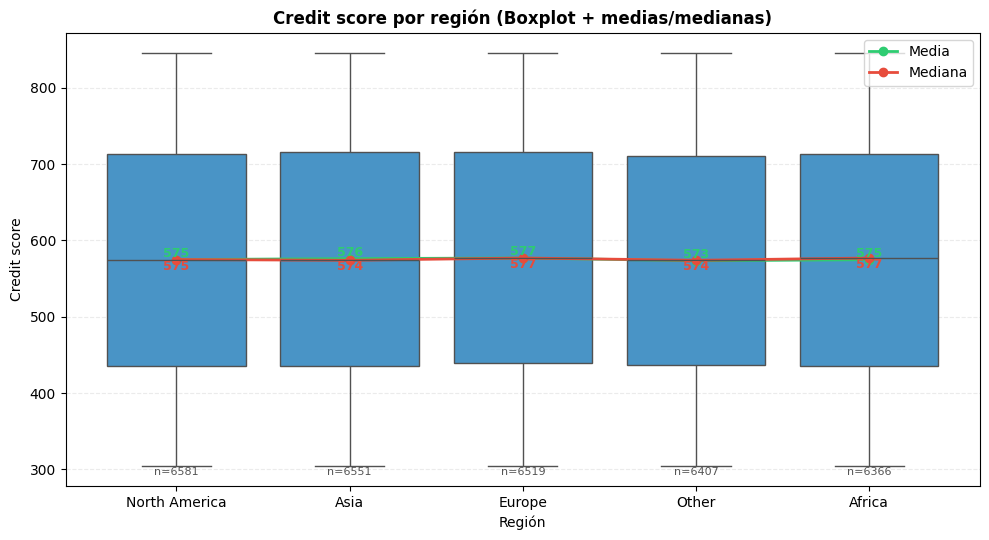

,media,mediana,n
region,,,
North America,574.93,575.0,6581
Asia,576.21,574.0,6551
Europe,577.02,577.0,6519
Other,573.37,574.0,6407
Africa,574.73,577.0,6366


In [68]:
# --- Preparación de datos ---
cols = ["region", "credit_score"]
df_rc = (df[cols]
         .rename(columns={"credit_score":"CS"})
         .replace([np.inf, -np.inf], np.nan)
         .dropna()
         .copy())

# Orden de regiones por tamaño (o fija el tuyo)
orden = df_rc["region"].value_counts().index.tolist()
df_rc["region"] = pd.Categorical(df_rc["region"], categories=orden, ordered=True)

# (Opcional) recorte suave por si hay valores sintéticos en bordes
p01, p99 = df_rc["CS"].quantile([.01, .99])
df_rc["CS_clip"] = df_rc["CS"].clip(lower=p01, upper=p99)

# Estadísticas por región
stats = (df_rc.groupby("region")["CS"]
         .agg(media="mean", mediana="median", n="count")
         .reindex(orden)
         .round(2))

# --- Gráfico único: Boxplot + medias/medianas ---
plt.figure(figsize=(10,5.5))
ax = plt.gca()

sns.boxplot(data=df_rc, x="region", y="CS_clip",
            order=orden, showfliers=False, color=color_total, ax=ax)

ax.set_title("Credit score por región (Boxplot + medias/medianas)", fontweight='bold')
ax.set_xlabel("Región"); ax.set_ylabel("Credit score")
ax.grid(axis='y', alpha=.25, linestyle='--')

# Líneas de media y mediana
xpos = np.arange(len(stats))
ax.plot(xpos, stats["media"].values,   marker='o', color=color_activos, linewidth=2, label="Media")
ax.plot(xpos, stats["mediana"].values, marker='o', color=color_churned,  linewidth=2, label="Mediana")

# Etiquetas de valores y tamaño muestral
for i, (m, md, n) in enumerate(zip(stats["media"], stats["mediana"], stats["n"])):
    ax.text(i, m,  f"{m:.0f}", ha='center', va='bottom', fontsize=9, color=color_activos, fontweight='bold')
    ax.text(i, md, f"{md:.0f}",ha='center', va='top',    fontsize=9, color=color_churned,  fontweight='bold')
    ax.text(i, ax.get_ylim()[0] + (ax.get_ylim()[1]-ax.get_ylim()[0])*0.02,
            f"n={n}", ha='center', va='bottom', fontsize=8, color="#555")

ax.legend(loc="upper right")
plt.tight_layout(); plt.show()

# Revisar la tabla en consola
stats

Las puntuaciones de crédito son muy consistentes entre regiones, con medias y medianas cercanas a 575 puntos.

Europa y Asia presentan los valores medios más altos (576–577), aunque las diferencias son mínimas.

La distribución general es similar y equilibrada, sin presencia de sesgos extremos ni regiones con ventajas claras.

El nivel crediticio promedio es uniforme a nivel global, sin disparidades notables por ubicación.

### 4.- region vs savings_usd

#### Comparar la forma completa de la distribución de ahorros y comparar la capacidad de ahorro relevante de cada región.

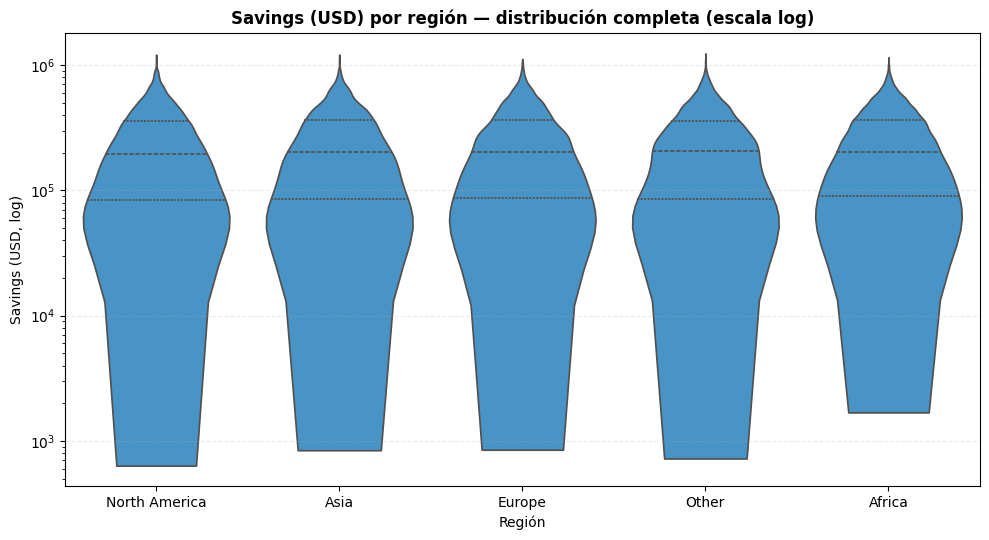

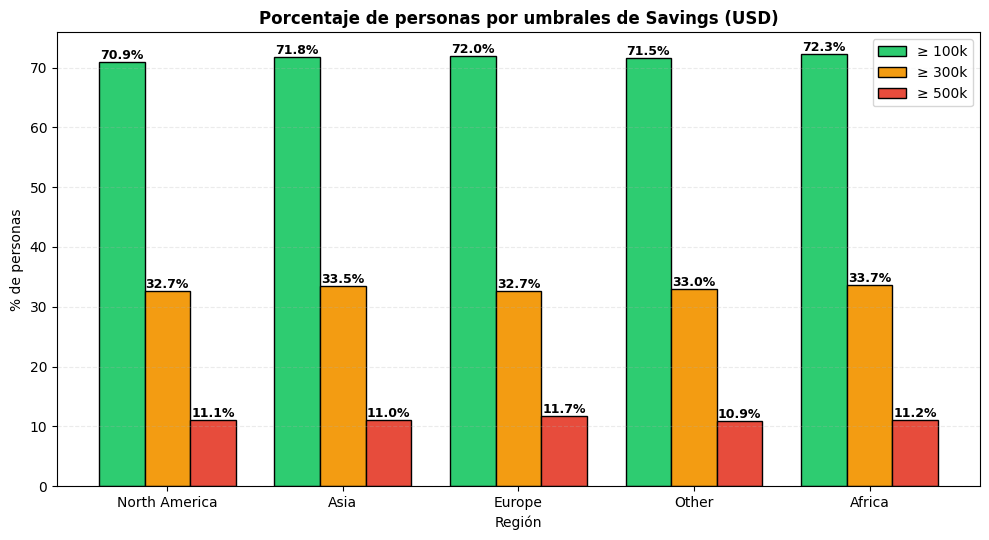

,n,>= 100k,>= 300k,>= 500k
region,,,,
North America,6581,70.870688,32.654612,11.122930
Asia,6551,71.760037,33.491070,11.036483
Europe,6519,72.004909,32.719742,11.704249
Other,6407,71.531138,33.010769,10.878726
Africa,6366,72.274584,33.663211,11.153000


In [69]:
# Preparación de datos
# ---------------------------
cols = ["region", "savings_usd"]
df_sav = (df[cols]
          .rename(columns={"savings_usd":"SAV"})
          .replace([np.inf, -np.inf], np.nan)
          .dropna()
          .copy())

# Orden de regiones por tamaño (o fija el tuyo)
orden = df_sav["region"].value_counts().index.tolist()
df_sav["region"] = pd.Categorical(df_sav["region"], categories=orden, ordered=True)

# ---------------------------
# A) Violin plot (log Y) con cuartiles
# ---------------------------
plt.figure(figsize=(10,5.5))
ax = sns.violinplot(
    data=df_sav, x="region", y="SAV",
    order=orden, inner="quartile", cut=0,
    palette=[color_total]*len(orden)
)
ax.set_yscale("log")
ax.set_title("Savings (USD) por región — distribución completa (escala log)", fontweight='bold')
ax.set_xlabel("Región"); ax.set_ylabel("Savings (USD, log)")
ax.grid(axis='y', alpha=.25, linestyle='--')
plt.tight_layout(); plt.show()

# ---------------------------
# B) Barras agrupadas por umbrales (≥100k, ≥300k, ≥500k)
# ---------------------------
umbral_cols = {
    ">= 100k": (df_sav["SAV"] >= 100_000),
    ">= 300k": (df_sav["SAV"] >= 300_000),
    ">= 500k": (df_sav["SAV"] >= 500_000),
}

# % por región y umbral
tab = []
for reg, g in df_sav.groupby("region"):
    n = len(g)
    row = {"region": reg, "n": n}
    for k, mask in umbral_cols.items():
        row[k] = (g["SAV"] >= int(k.split()[1].replace('k','000'))).mean()*100
    tab.append(row)
stats_thr = pd.DataFrame(tab).set_index("region").loc[orden]

# Gráfico
x = np.arange(len(stats_thr))
w = 0.26
plt.figure(figsize=(10,5.5))
bars1 = plt.bar(x - w, stats_thr[">= 100k"], width=w, color=color_activos, edgecolor="black", label="≥ 100k")
bars2 = plt.bar(x,       stats_thr[">= 300k"], width=w, color=color_extra1, edgecolor="black", label="≥ 300k")
bars3 = plt.bar(x + w,   stats_thr[">= 500k"], width=w, color=color_churned, edgecolor="black", label="≥ 500k")

plt.xticks(x, stats_thr.index.astype(str))
plt.ylabel("% de personas"); plt.xlabel("Región")
plt.title("Porcentaje de personas por umbrales de Savings (USD)", fontweight='bold')
plt.grid(axis='y', alpha=.25, linestyle='--')
for bars in (bars1, bars2, bars3):
    for b in bars:
        v = b.get_height()
        plt.text(b.get_x()+b.get_width()/2, v, f"{v:.1f}%", ha='center', va='bottom', fontsize=9, fontweight='bold')
plt.legend()
plt.tight_layout(); plt.show()

# Ver la tabla en consola
stats_thr

Los violines (escala log) muestran formas casi idénticas entre regiones: colas largas hacia ahorros altos y medianas muy similares (patrón amplio pero comparable).

Por umbrales, la proporción que supera ≥100k ronda 71–72%, ≥300k ≈33% y ≥500k ≈11% en todas las regiones.

Europa y África quedan levemente por encima en ≥100k/≥500k (≈72% y ≈11.2–11.7%), mientras North America es apenas menor (≈70.9% y ≈11.1%); diferencias muy pequeñas.

La región no parece un driver fuerte de los ahorros acumulados: los niveles absolutos y su distribución son consistentes globalmente.

# Next Steps

- Profundizar en el análisis correlacional entre ratios financieros.
- Explorar la distribución del score crediticio por región y situación laboral.
- Analizar los niveles de ahorro en relación con los ingresos y la edad.
- Documentar los hallazgos visuales y las conclusiones generales del EDA.